# width-depth
Compare Cygnus/BO/etc. at:
- Fixed depth (1, 2, 4, 8)
- Fixed width (2, 4, 8)
- Dynamic width

In [1]:
from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

# Configuration

In [2]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    #'L2C_pf_issued',
    #'LLC_mpki',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    # {'PC'}, 
]

baselines = ['bo', 'spp_dev2', 'spp_ppf_dev', 'bingo']
dpi = 150

depths = [1, 2, 4, 8]
widths = [1, 2, 4, 8]
bo_scores = [0, 4, 8, 16, 20, 24, 28, 29, 30]#, 31]

In [3]:
dfs = {}

for d in depths:
    dfs[f'depth{d}/bo'] = tables.load_stats_csv(
        base_dir, f'degreedyn/bo/fixeddepth/depth{d}.csv', prefetchers=['bo'])

for w in widths:
    dfs[f'width{w}/cygnus'] = tables.load_stats_csv_pythia(
        base_dir, f'degreedyn/cygnus/bwaware3_width_moreactions_real_fixedwidth/{w}width.csv',
        feature_sets=features, feature_key='cygnus_features')

    if w == 1:
        continue

    dfs[f'width{w}/bo'] = tables.load_stats_csv(
        base_dir, f'degreedyn/bo/fixeddepth/width{w}.csv', prefetchers=['bo'])

for bos in bo_scores:
    dfs[f'widthdyn/bo_{bos}'] = tables.load_stats_csv(
        base_dir, f'degreedyn/bo/dynwidth/score{bos}.csv', prefetchers=['bo'])
    
dfs['widthdyn/bo_16_fallback'] = tables.load_stats_csv(
    base_dir, f'degreedyn/bo/dynwidth/score16_fallback.csv', prefetchers=['bo'])

dfs['widthdyn/cygnus_-3'] = tables.load_stats_csv_pythia(
    base_dir, f'degreedyn/cygnus/bwaware3_width_moreactions_real_mshraware.csv',
    feature_sets=features, feature_key='cygnus_features')

dfs['widthdyn/cygnus_actionprio_-3'] = tables.load_stats_csv_pythia(
    base_dir, f'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio.csv',
    feature_sets=features, feature_key='cygnus_features')

# Plots

## Fixed degree

In [6]:
degree_df = {
    'BO depth1': dfs['depth1/bo']['bo'],
    'BO depth2': dfs['depth2/bo']['bo'],
    'BO depth4': dfs['depth4/bo']['bo'],
    'BO depth8': dfs['depth8/bo']['bo'],

    'BO width2': dfs['width2/bo']['bo'],
    'BO width4': dfs['width4/bo']['bo'],
    'BO width8': dfs['width8/bo']['bo'],
    'BO widthdyn (16)': dfs['widthdyn/bo_16']['bo'],
    'BO widthdyn (16) +Fallback': dfs['widthdyn/bo_16_fallback']['bo'],

    'Cygnus width2': dfs['width2/cygnus']['Delta_Path, PC_Delta'],
    'Cygnus width4': dfs['width4/cygnus']['Delta_Path, PC_Delta'],
    'Cygnus width8': dfs['width8/cygnus']['Delta_Path, PC_Delta'],
    'Cygnus widthdyn (-3)': dfs['widthdyn/cygnus_-3']['Delta_Path, PC_Delta'],
    'Cygnus widthdyn (-3) +ActionPrio': dfs['widthdyn/cygnus_actionprio_-3']['Delta_Path, PC_Delta'],
}

degree_colors = defaultdict(lambda: None, {
    'BO depth1': colormaps['Blues'](0.3),
    'BO depth2': colormaps['Blues'](0.4),
    'BO depth4': colormaps['Blues'](0.5),
    'BO depth8': colormaps['Blues'](0.6),

    'BO width2': colormaps['Greens'](0.4),
    'BO width4': colormaps['Greens'](0.5),
    'BO width8': colormaps['Greens'](0.6),
    'BO widthdyn (16)': colormaps['Greens'](0.9),
    'BO widthdyn (16) +Fallback': colormaps['Greens'](1.0),

    'Cygnus width2': colormaps['Oranges'](0.4),
    'Cygnus width4': colormaps['Oranges'](0.5),
    'Cygnus width8': colormaps['Oranges'](0.6),
    'Cygnus widthdyn (-3)': colormaps['Oranges'](0.9),
    'Cygnus widthdyn (-3) +ActionPrio': colormaps['Oranges'](1.0),
})

degree_hatches = defaultdict(lambda: None, {
    'BO depth1': 'o',
    'BO depth2': 'o',
    'BO depth4': 'o',
    'BO depth8': 'o',

    'BO width2': 'o',
    'BO width4': 'o',
    'BO width8': 'o',
    'BO widthdyn (16)': 'o',
    
    'Cygnus width2': '//',
    'Cygnus width4': '//',
    'Cygnus width8': '//',
    'Cygnus widthdyn': '//',
    'Cygnus widthdyn (-3)': '//',
    'Cygnus widthdyn (-3) +ActionPrio': '//',
})

degree_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degree_label_kwargs = {
    # 'rotation': 45,
    # 'ha': 'right',
    'fontsize': 7,
}

degree_legend_kwargs_wide = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

### IPC improvement

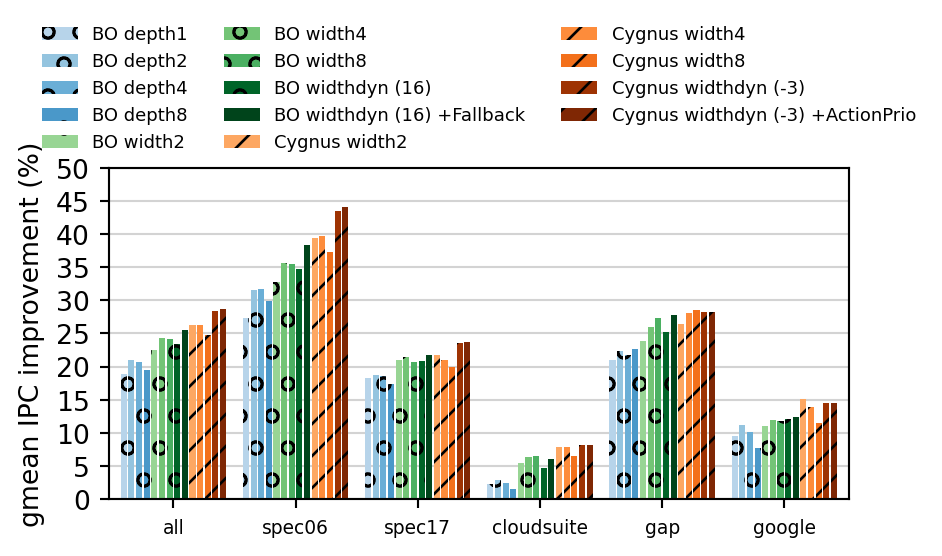

In [7]:
reload(plots)
plots.plot_metric_means(degree_df, suites=suites, metric='ipc_improvement',
                        colors=degree_colors,
                        hatches=degree_hatches,
                        legend_kwargs=degree_legend_kwargs,
                        label_kwargs=degree_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 50),
                        dpi=192, figsize=(5, 3))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


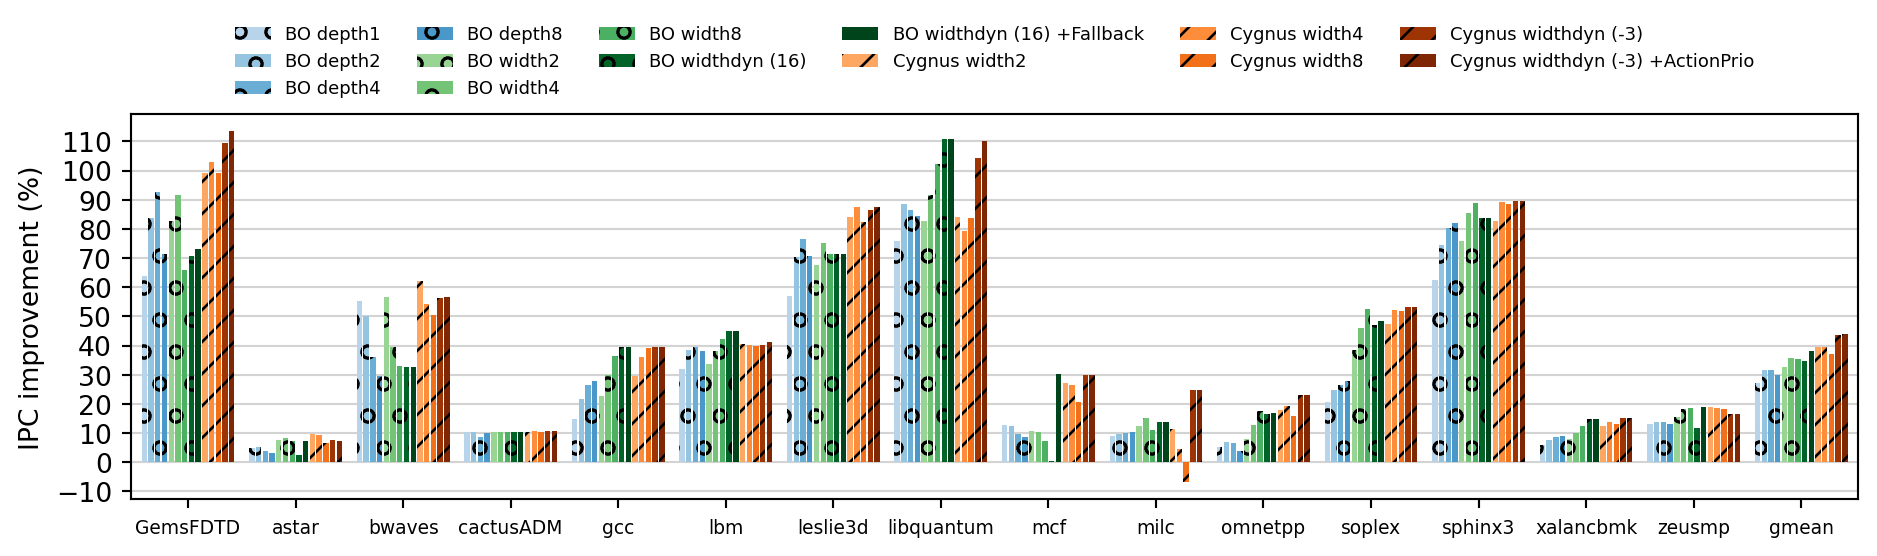

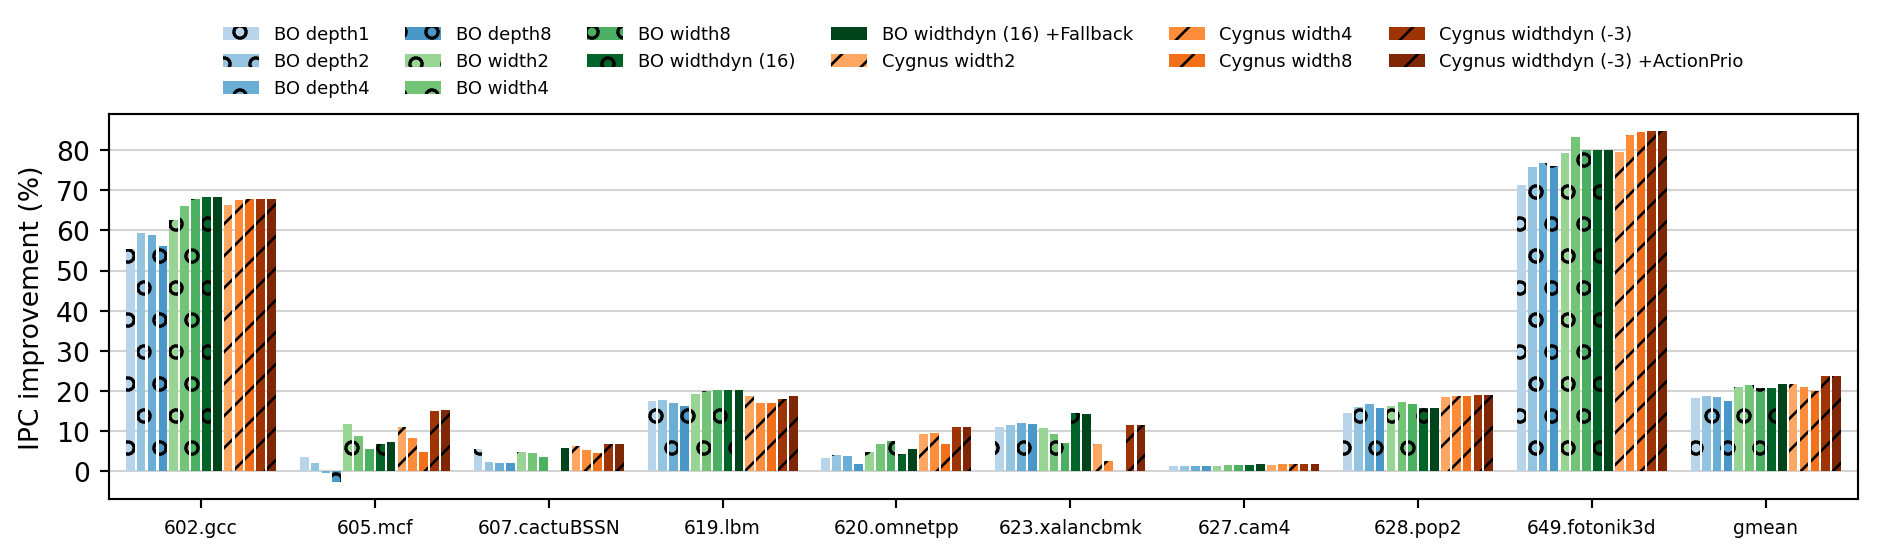

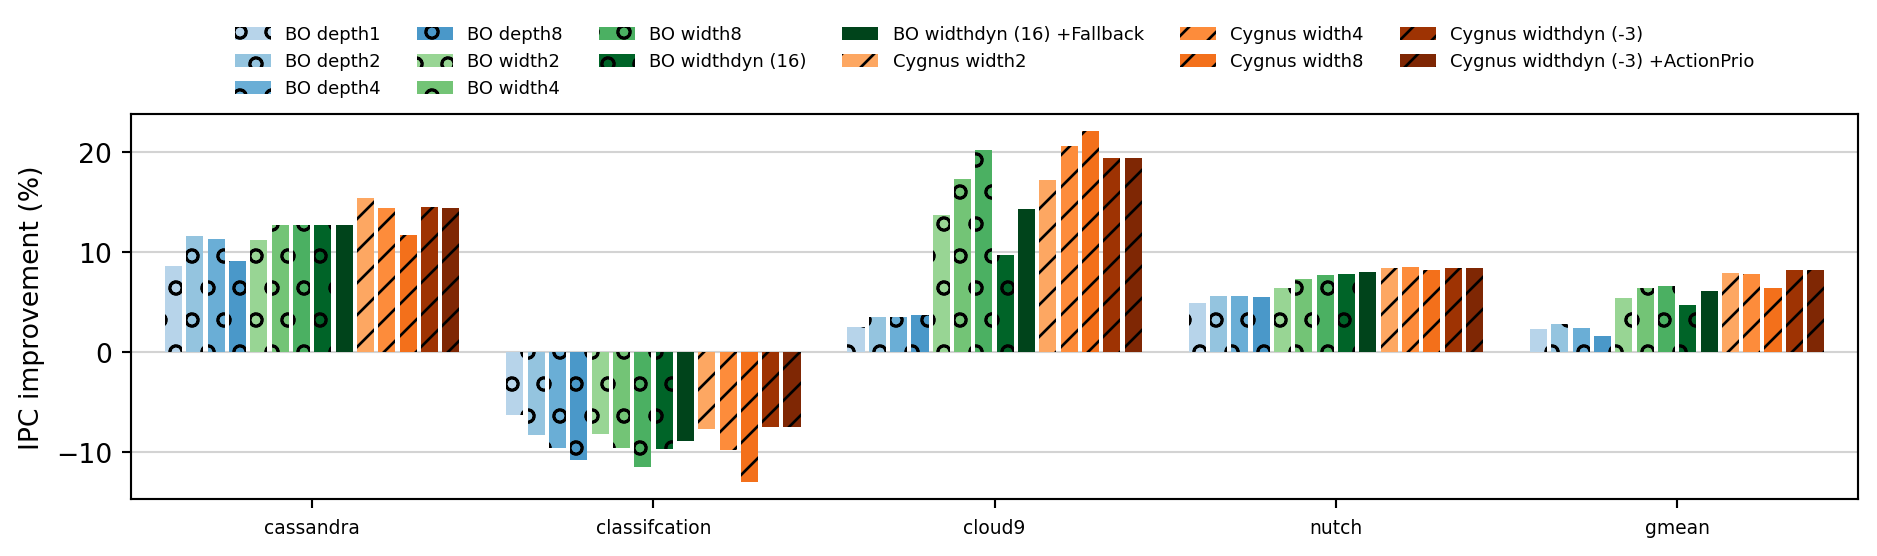

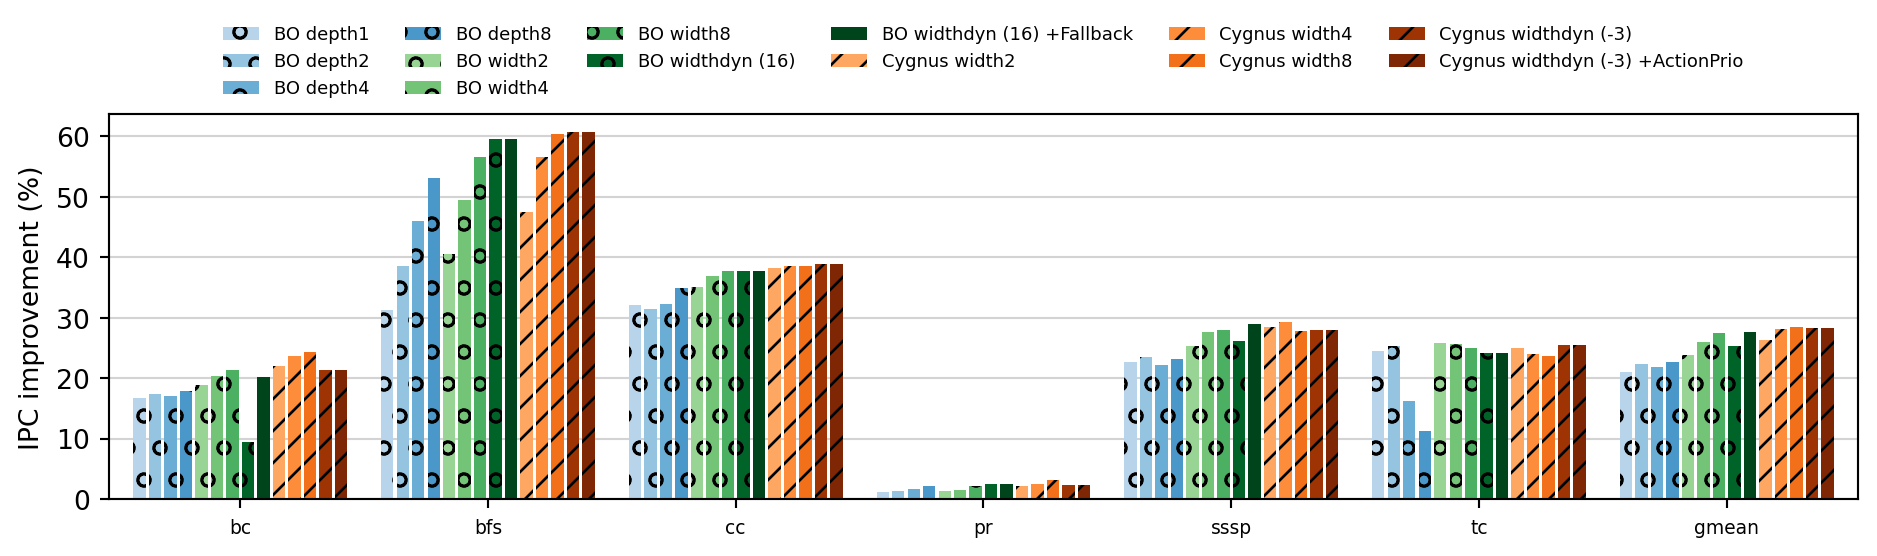

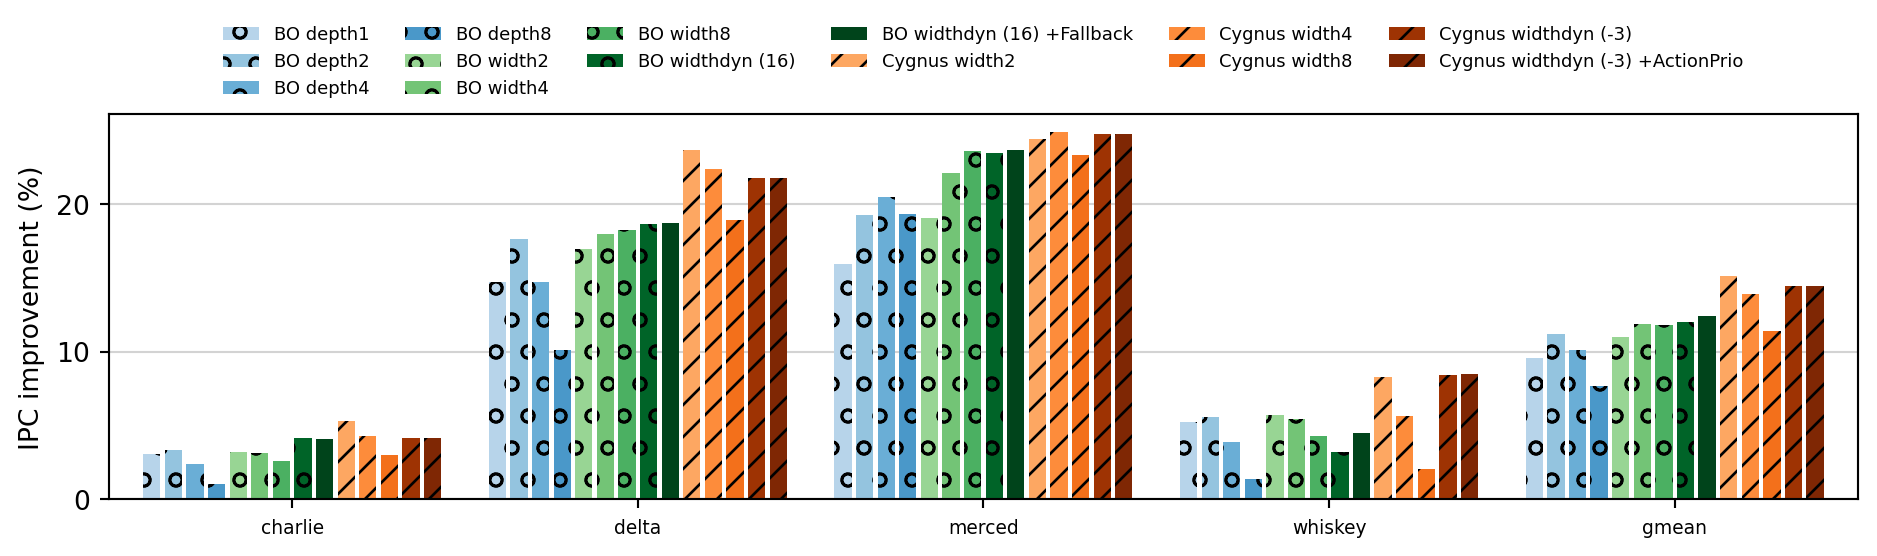

In [8]:
plots.plot_everything(degree_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=degree_colors,
                      hatches=degree_hatches,
                      legend_kwargs=degree_legend_kwargs_wide,
                      label_kwargs=degree_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      dpi=192, figsize=(10, 3))

### L2C prefetches issued

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


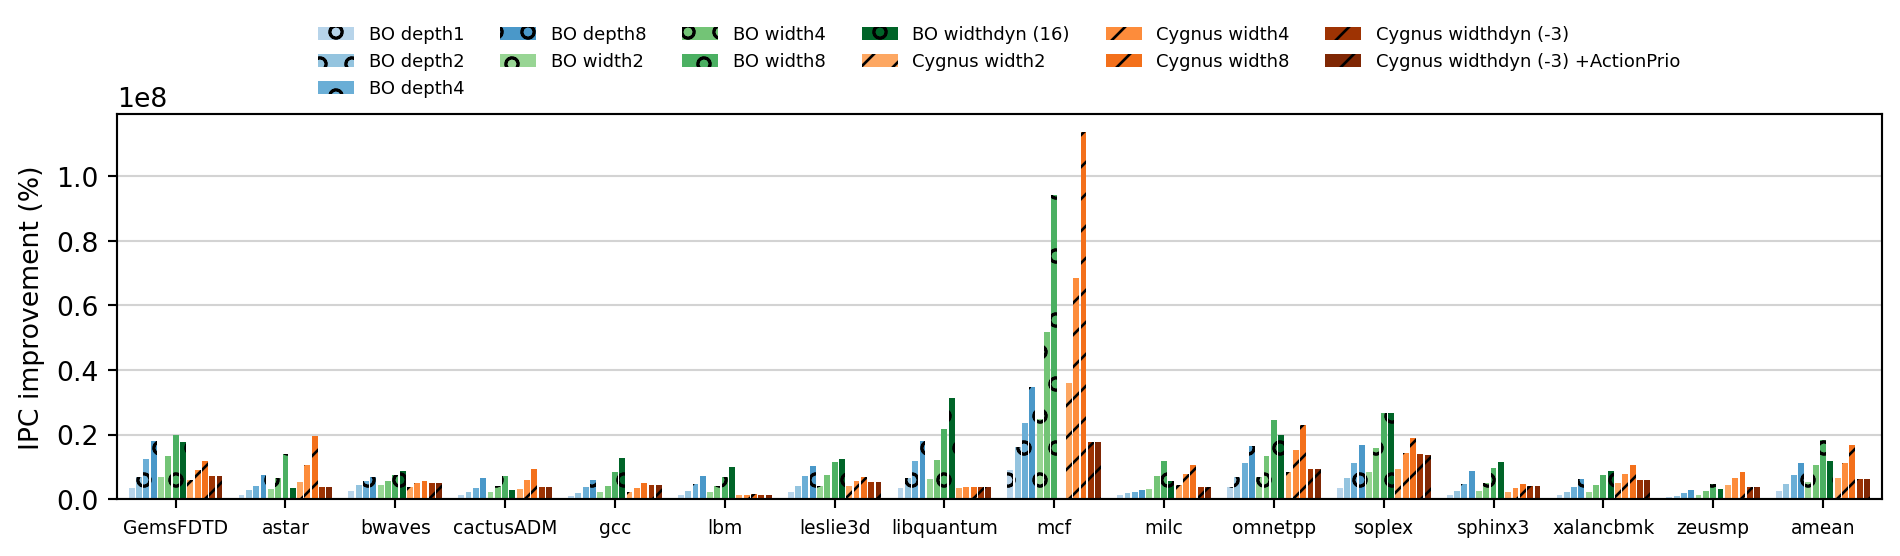

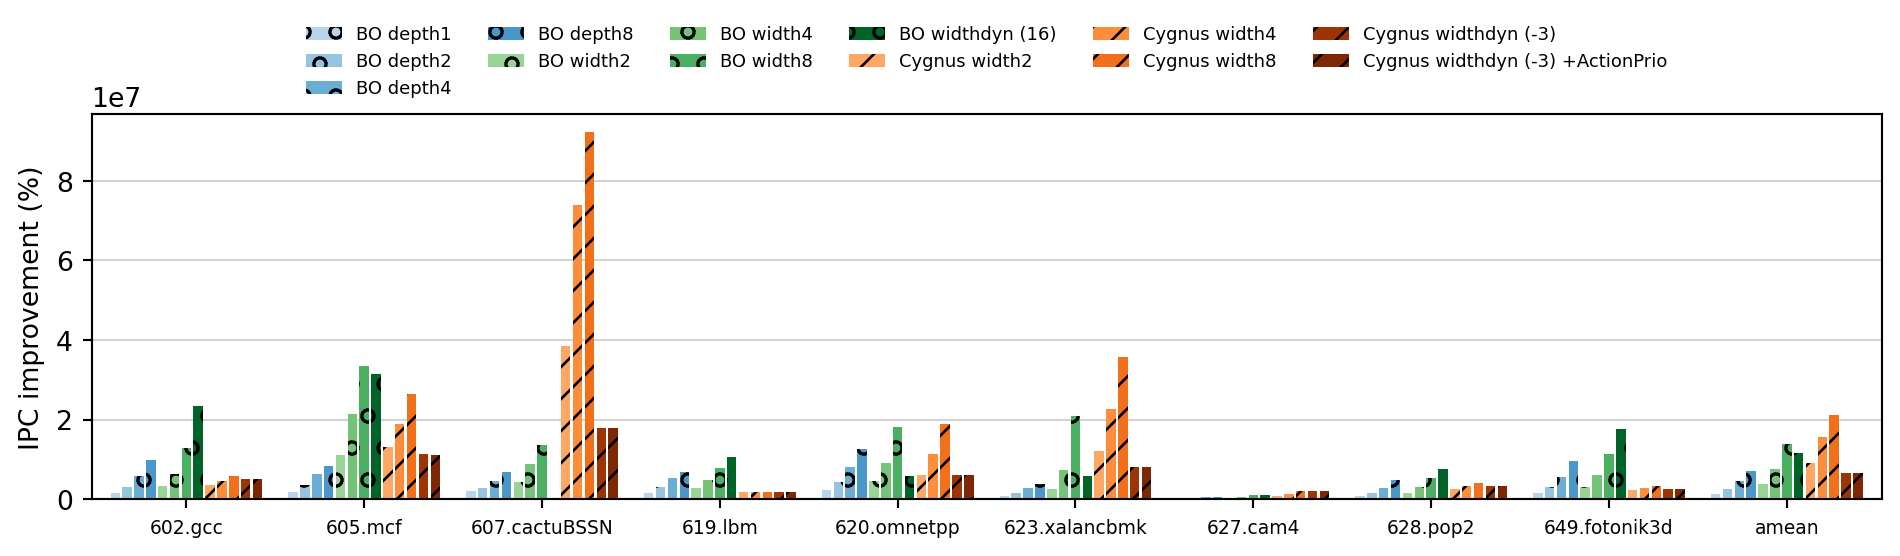

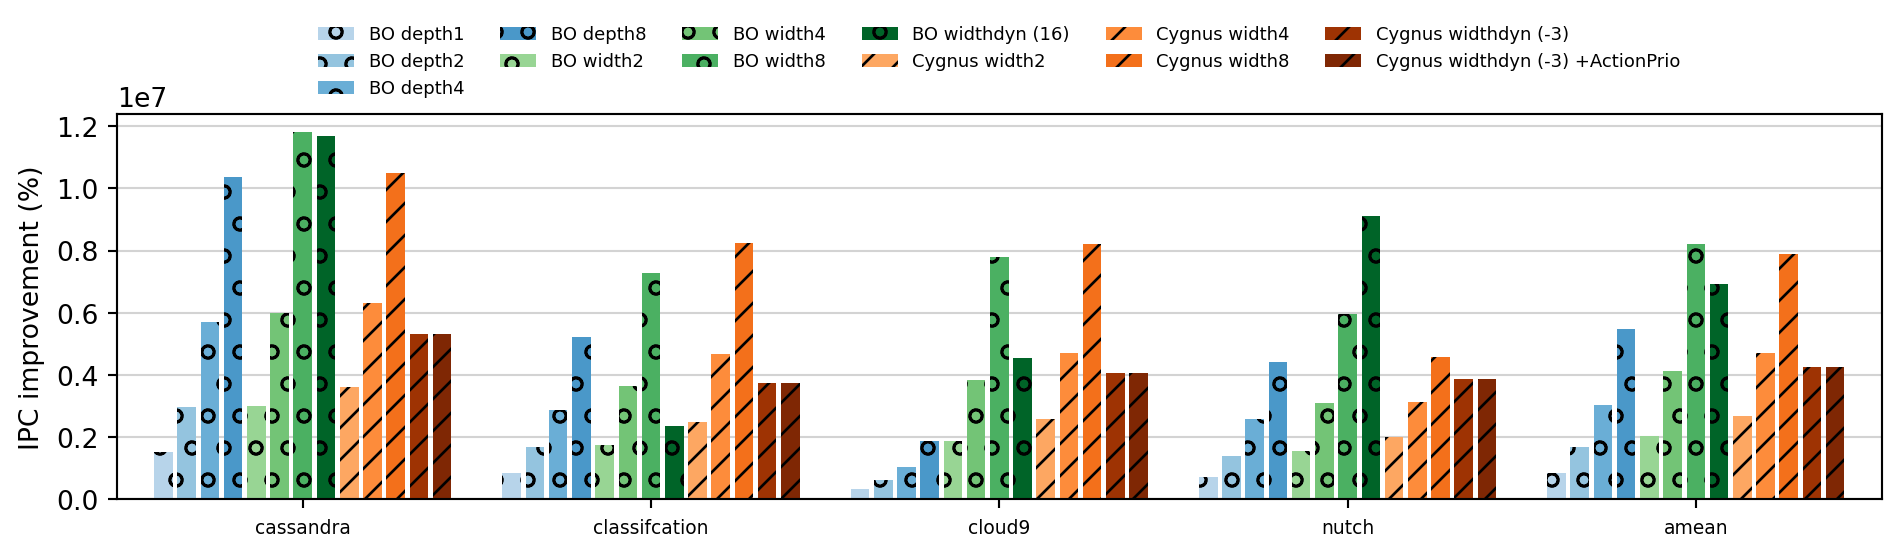

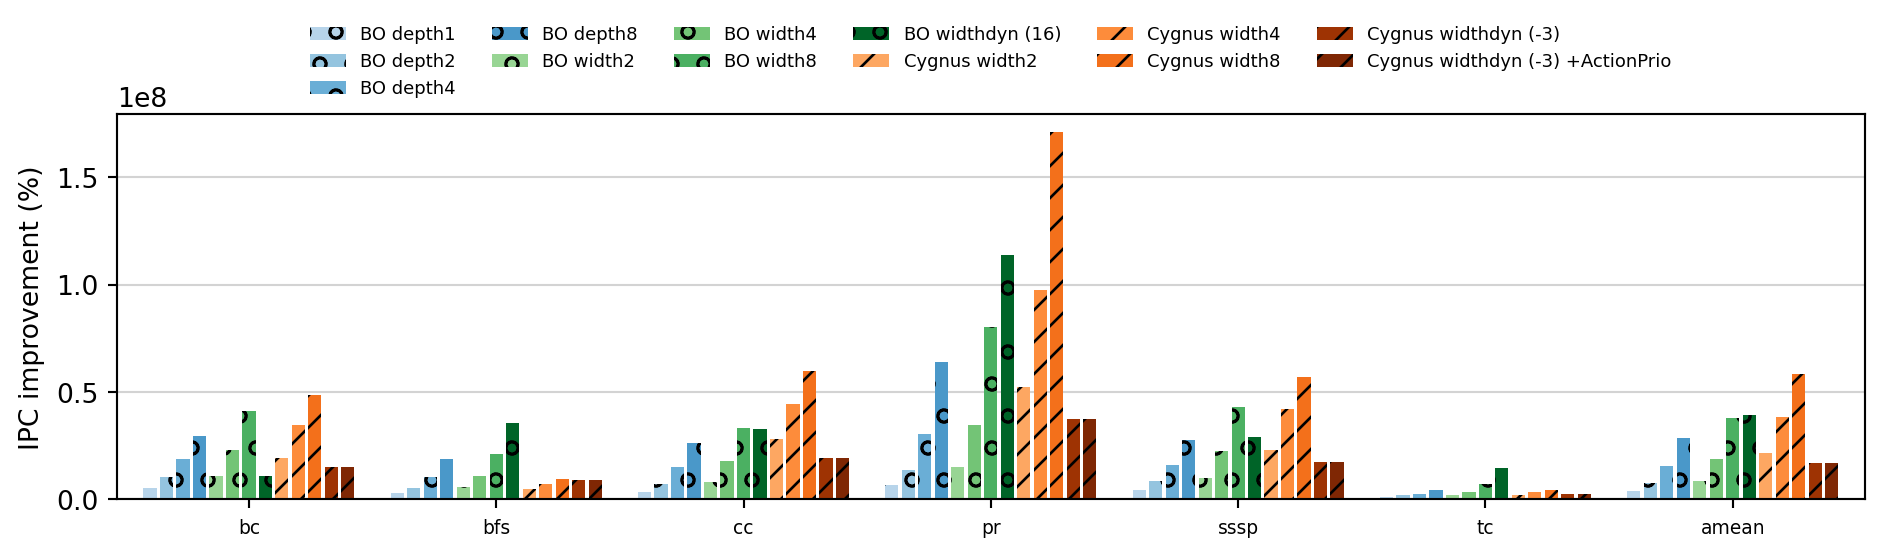

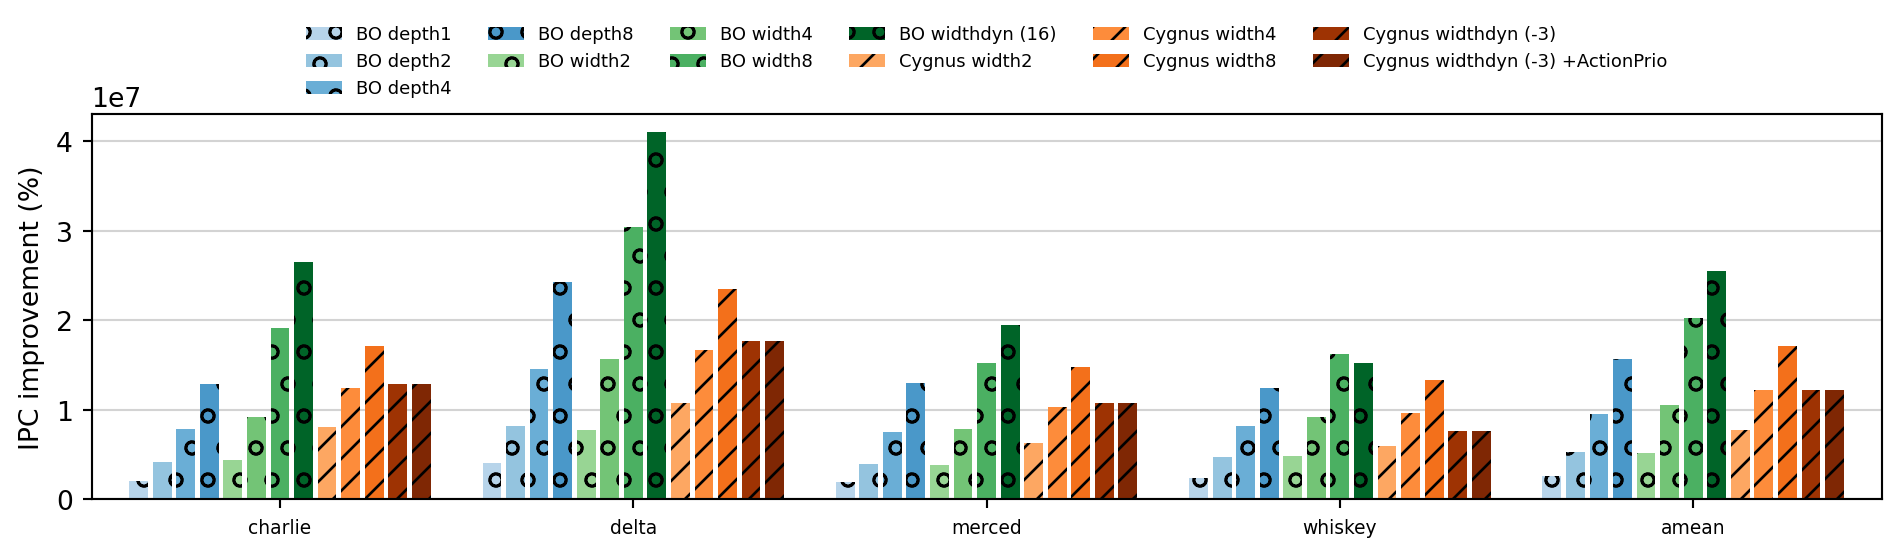

In [56]:
plots.plot_everything(degree_df, suites=suites, metrics=['L2C_pf_issued'], 
                      colors=degree_colors,
                      hatches=degree_hatches,
                      legend_kwargs=degree_legend_kwargs_wide,
                      label_kwargs=degree_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      dpi=192, figsize=(10, 3))

### Accuracy

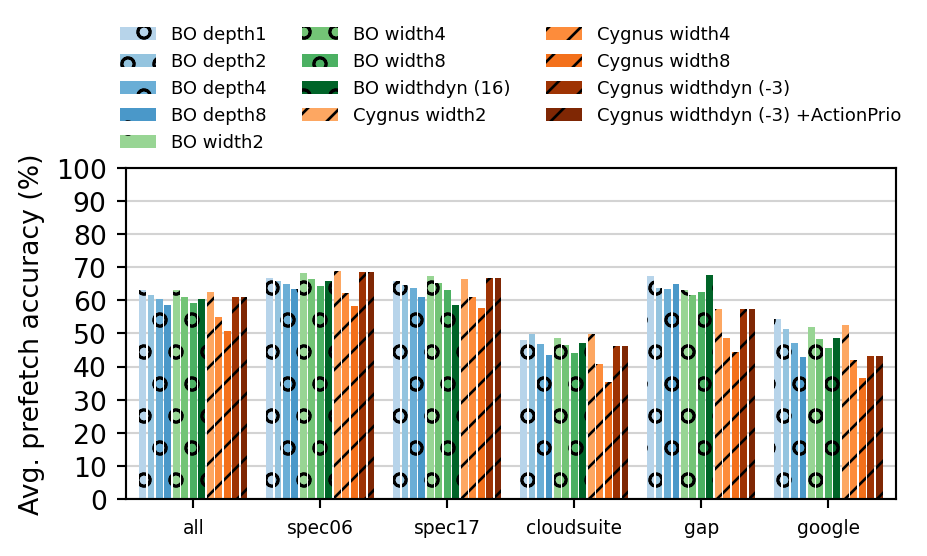

In [57]:
reload(plots)
plots.plot_metric_means(degree_df, suites=suites, metric='L2C_accuracy',
                        colors=degree_colors,
                        hatches=degree_hatches,
                        legend_kwargs=degree_legend_kwargs,
                        label_kwargs=degree_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch accuracy (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 3))

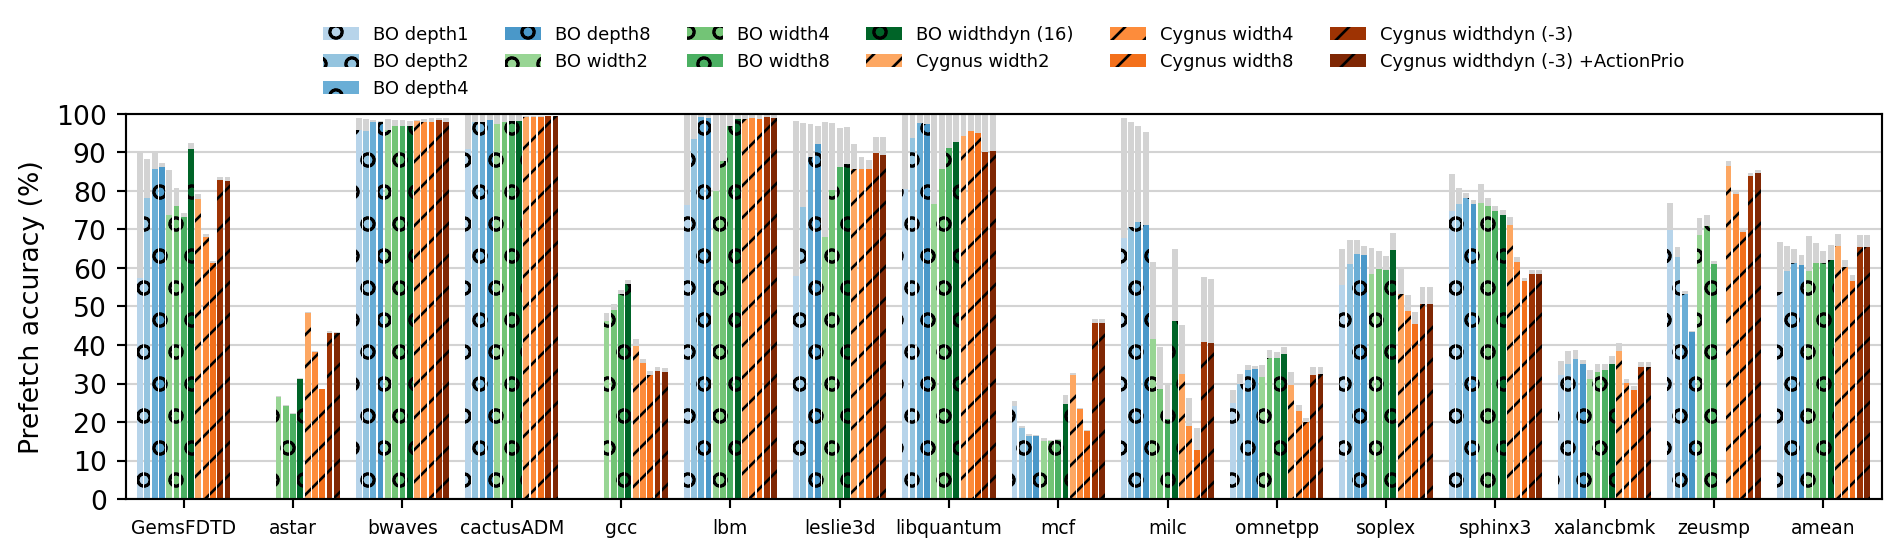

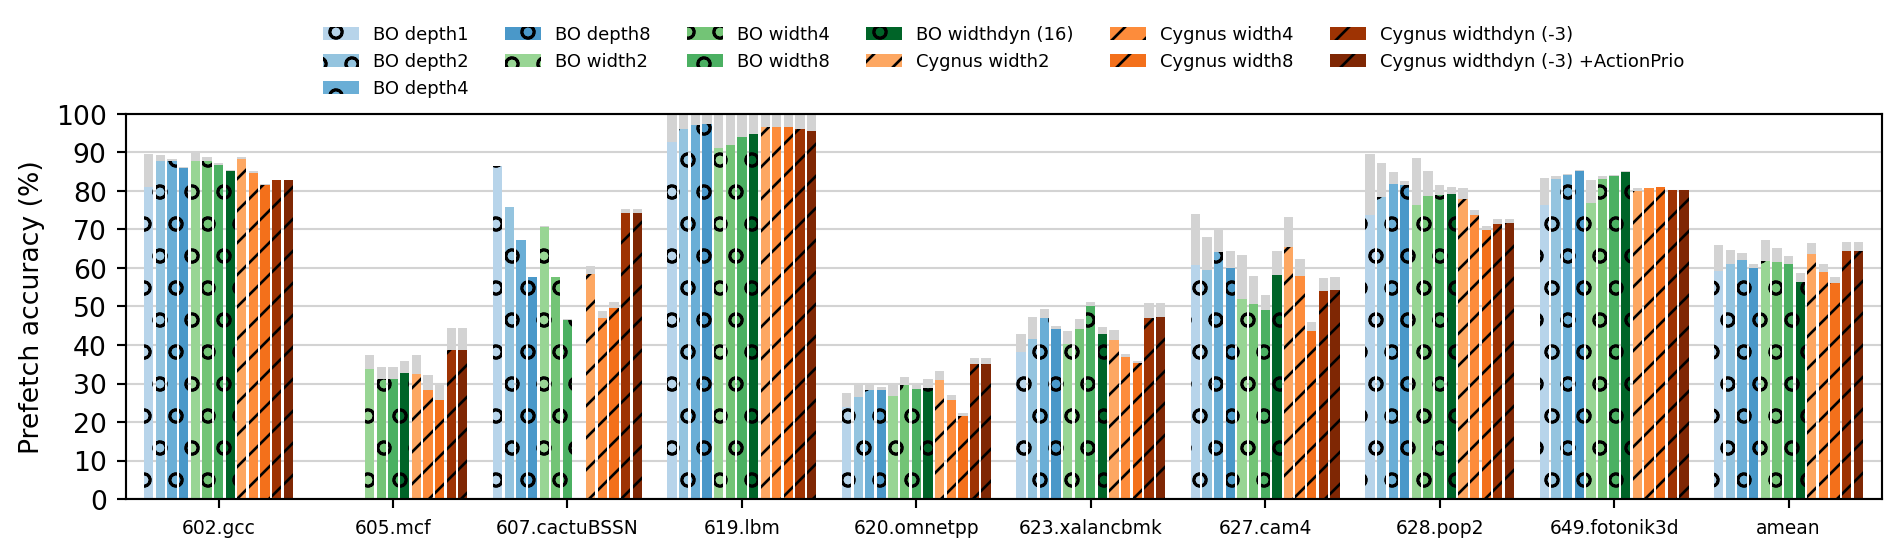

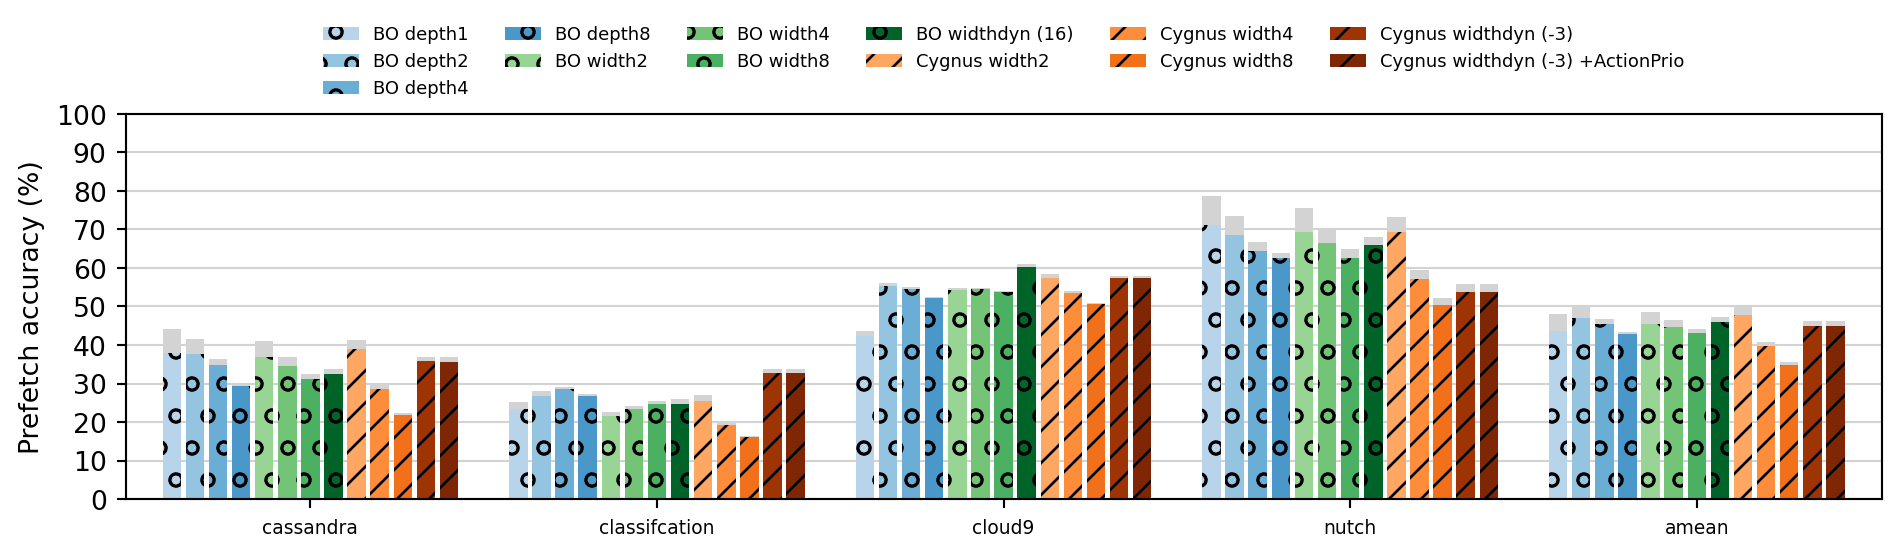

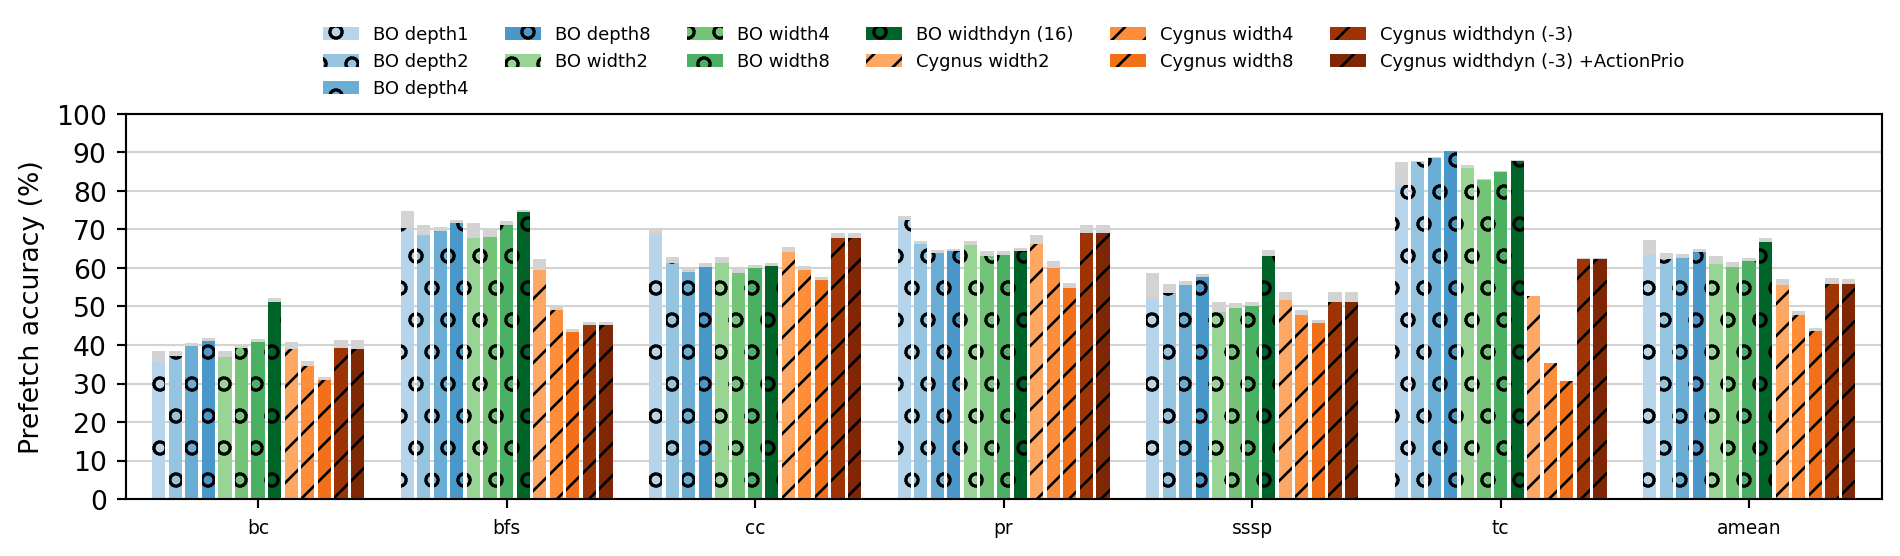

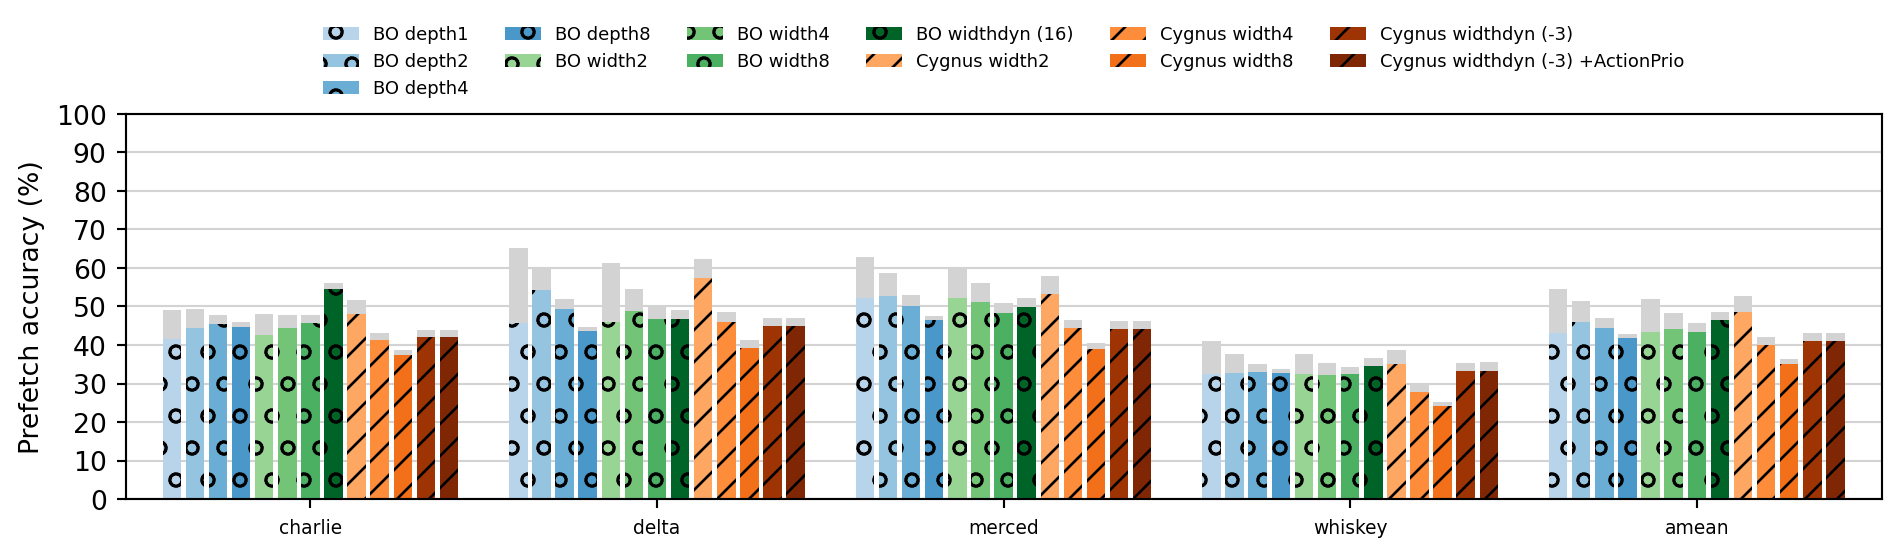

In [58]:
plots.plot_everything_accuracy(degree_df, suites=suites, level='L2C', 
                               colors=degree_colors,
                               hatches=degree_hatches,
                               legend_kwargs=degree_legend_kwargs_wide,
                               label_kwargs=degree_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch accuracy (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 3))

### Coverage

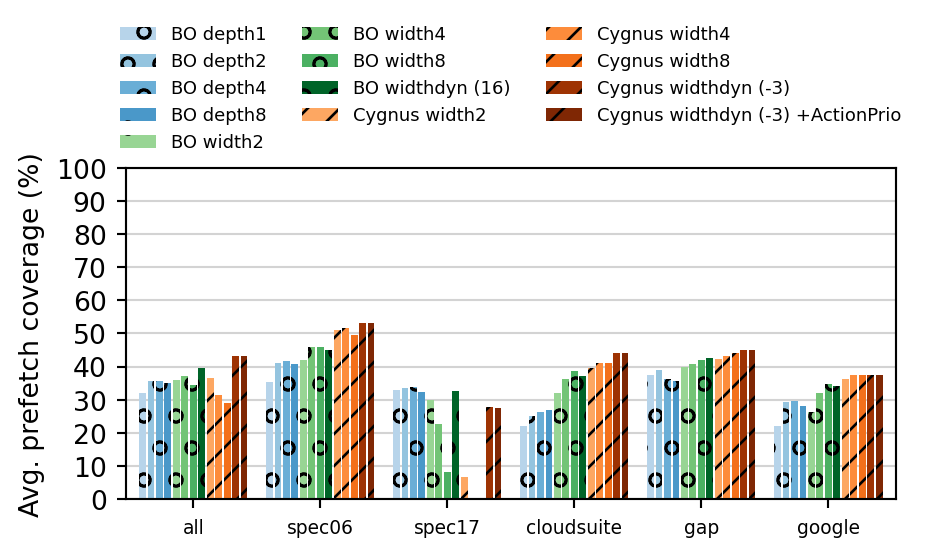

In [59]:
reload(plots)
plots.plot_metric_means(degree_df, suites=suites, metric='L2C_coverage',
                        colors=degree_colors,
                        hatches=degree_hatches,
                        legend_kwargs=degree_legend_kwargs,
                        label_kwargs=degree_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch coverage (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 3))

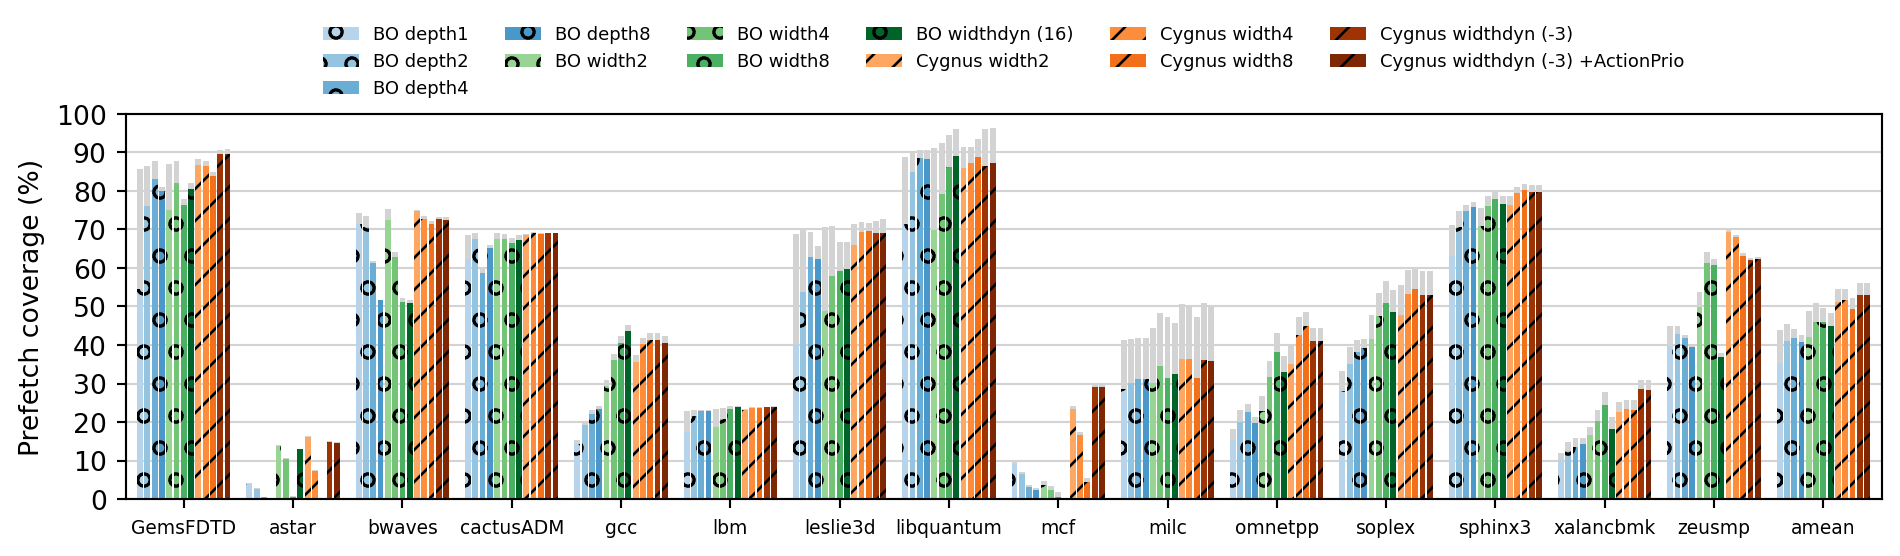

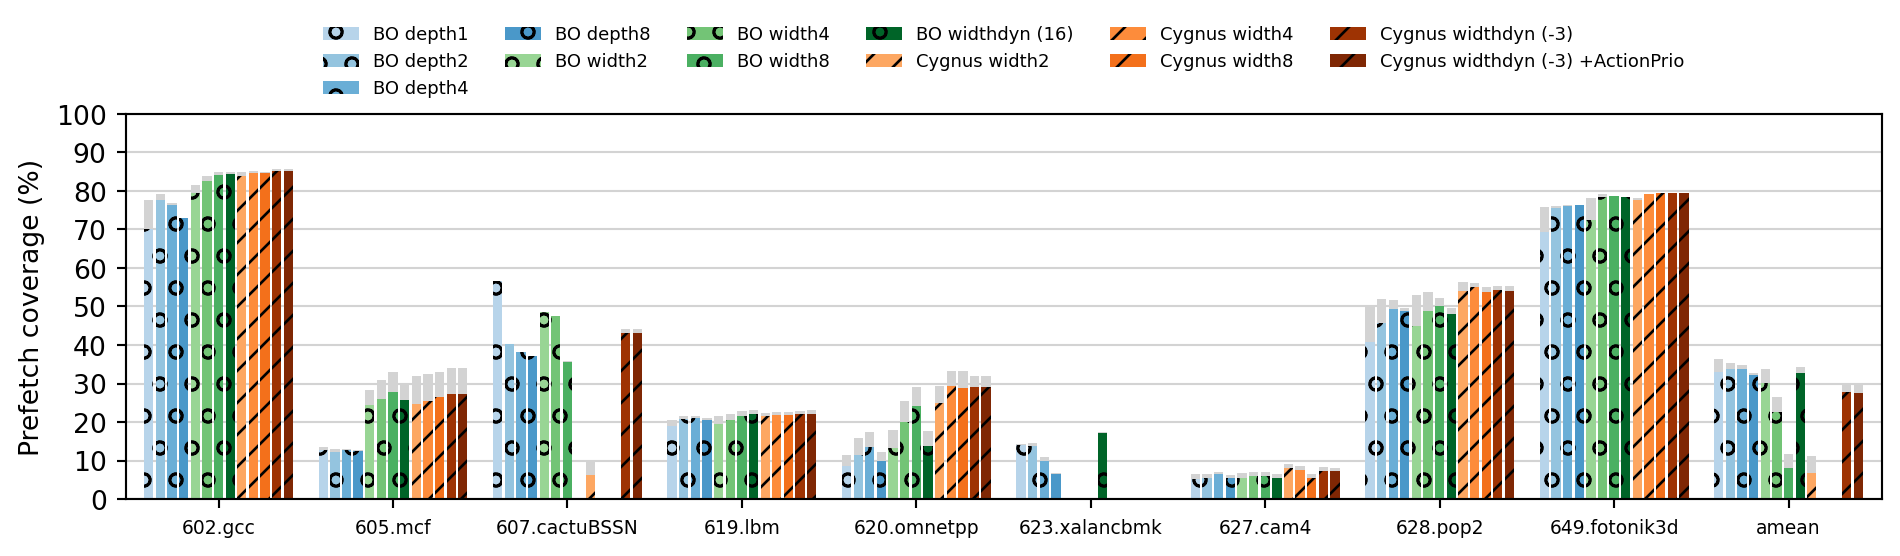

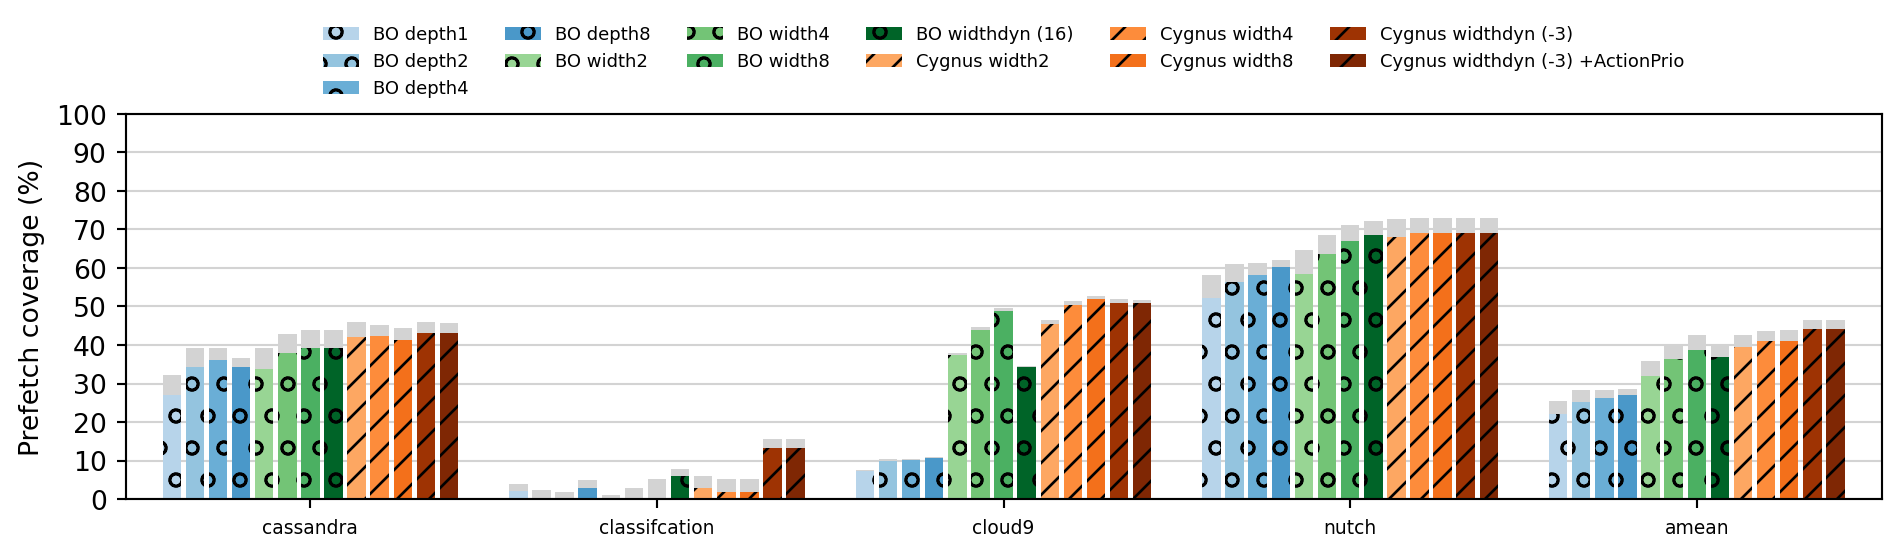

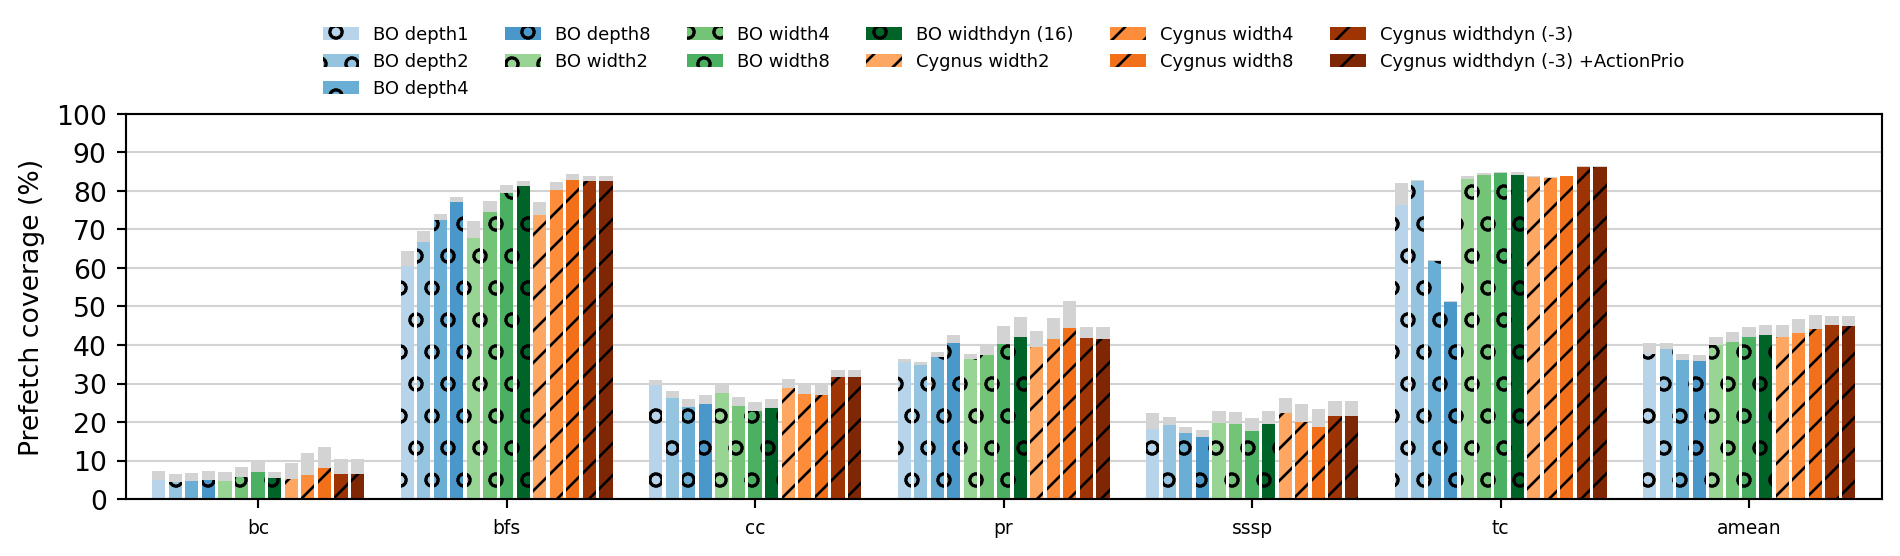

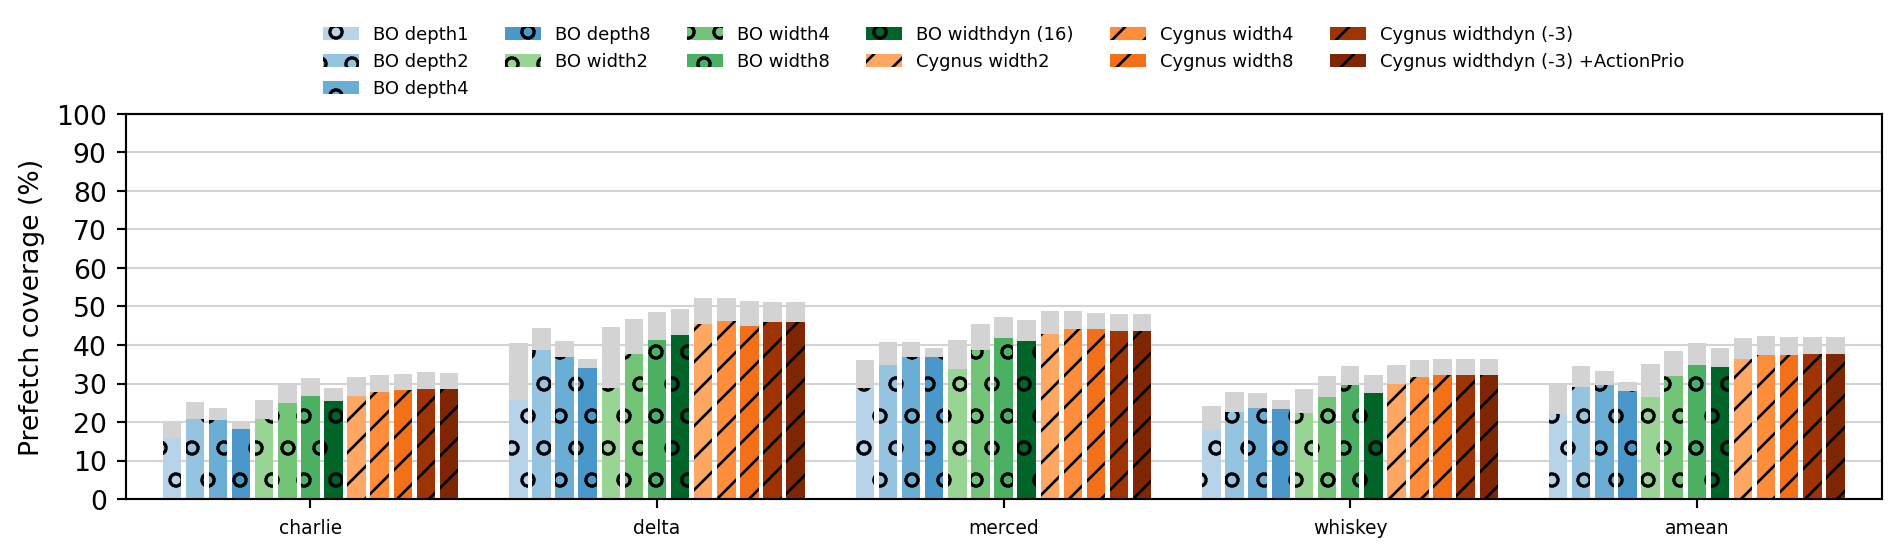

In [60]:
plots.plot_everything_coverage(degree_df, suites=suites, level='L2C', 
                               colors=degree_colors,
                               hatches=degree_hatches,
                               legend_kwargs=degree_legend_kwargs_wide,
                               label_kwargs=degree_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch coverage (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 3))

### Overpredictions

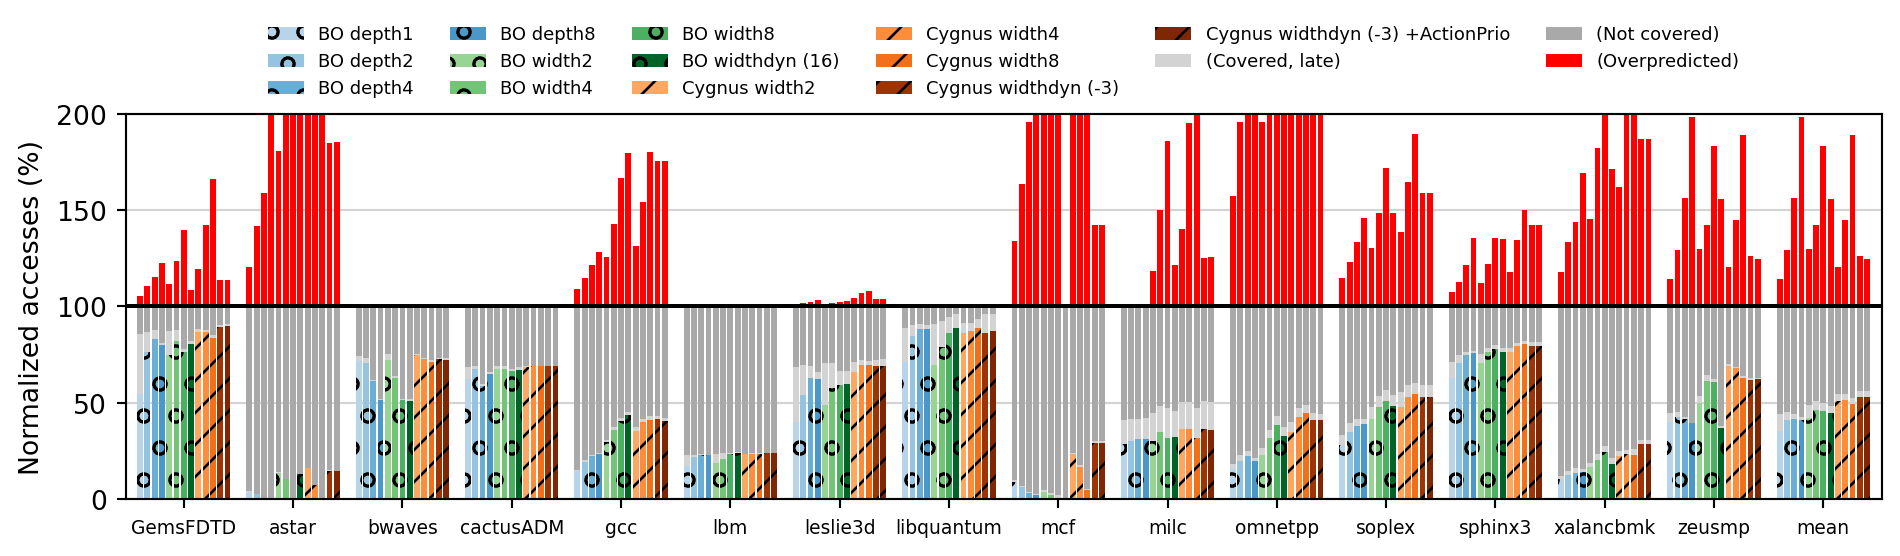

In [61]:
reload(plots)
plots.plot_overpredictions(degree_df, suite='spec06', phase='weighted', level='L2C', 
                           colors=degree_colors,
                           hatches=degree_hatches,
                           legend_kwargs=degree_legend_kwargs_wide,
                           label_kwargs=degree_label_kwargs,
                           add_suptitle=False,
                           add_xlabel=False,
                           annotate_outliers=False,
                           ytick_distance=50, ymin=0, ymax=200,
                           dpi=192, figsize=(10, 3))

## Dynamic degree

In [15]:
dyndegree_df = {
    'BO dynwidth 0': dfs['widthdyn/bo_0']['bo'],
    'BO dynwidth 4': dfs['widthdyn/bo_4']['bo'],
    'BO dynwidth 8': dfs['widthdyn/bo_8']['bo'],
    'BO dynwidth 16': dfs['widthdyn/bo_16']['bo'],
    'BO dynwidth 20': dfs['widthdyn/bo_20']['bo'],
    'BO dynwidth 24': dfs['widthdyn/bo_24']['bo'],
    'BO dynwidth 28': dfs['widthdyn/bo_28']['bo'],
    'BO dynwidth 29': dfs['widthdyn/bo_29']['bo'],
    'BO dynwidth 30': dfs['widthdyn/bo_30']['bo'],

    'BO dynwidth 16 +Fallback': dfs['widthdyn/bo_16_fallback']['bo'],
    'Cygnus dynwidth -3.0': dfs['widthdyn/cygnus_-3']['Delta_Path, PC_Delta'],
    'Cygnus dynwidth -3.0 +ActionPrio': dfs['widthdyn/cygnus_actionprio_-3']['Delta_Path, PC_Delta'],
}

dyndegree_colors = defaultdict(lambda: None, {
    'BO dynwidth 0': colormaps['Blues'](0.1),
    'BO dynwidth 4': colormaps['Blues'](0.2),
    'BO dynwidth 8': colormaps['Blues'](0.3),
    'BO dynwidth 16': colormaps['Blues'](0.3),
    'BO dynwidth 20': colormaps['Blues'](0.5),
    'BO dynwidth 24': colormaps['Blues'](0.6),
    'BO dynwidth 28': colormaps['Blues'](0.7),
    'BO dynwidth 29': colormaps['Blues'](0.8),
    'BO dynwidth 30': colormaps['Blues'](0.9),
    'BO dynwidth 16 +Fallback': colormaps['Blues'](1.0),

    'Cygnus dynwidth -3.0': colormaps['Oranges'](0.65),
    'Cygnus dynwidth -3.0 +ActionPrio': colormaps['Oranges'](0.75),
})

dyndegree_hatches = defaultdict(lambda: None, {
    'BO dynwidth 0': 'o',
    'BO dynwidth 4': 'o',
    'BO dynwidth 8': 'o',
    'BO dynwidth 16': 'o',
    'BO dynwidth 20': 'o',
    'BO dynwidth 24': 'o',
    'BO dynwidth 28': 'o',
    'BO dynwidth 29': 'o',
    'BO dynwidth 30': 'o',
    'BO dynwidth 31': 'o',
    'BO dynwidth 16 +Fallback': 'o',

    'Cygnus dynwidth -3.0': '//',
    'Cygnus dynwidth -3.0 +ActionPrio': '//',
})

dyndegree_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

dyndegree_label_kwargs = {
    # 'rotation': 45,
    # 'ha': 'right',
    'fontsize': 7,
}

dyndegree_legend_kwargs_wide = {
    'ncol': 5,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

### IPC improvement

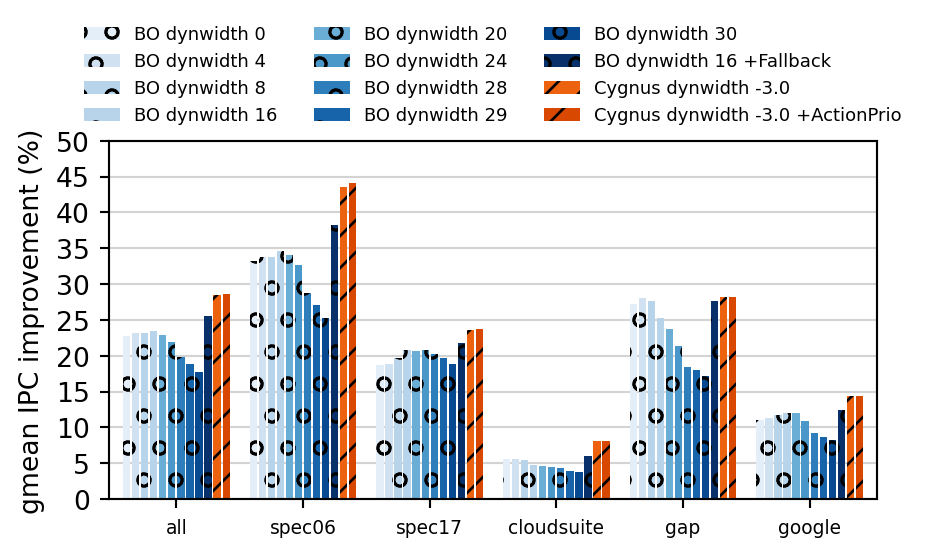

In [16]:
reload(plots)
plots.plot_metric_means(dyndegree_df, suites=suites, metric='ipc_improvement',
                        colors=dyndegree_colors,
                        hatches=dyndegree_hatches,
                        legend_kwargs=dyndegree_legend_kwargs,
                        label_kwargs=dyndegree_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 50),
                        dpi=192, figsize=(5, 3))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


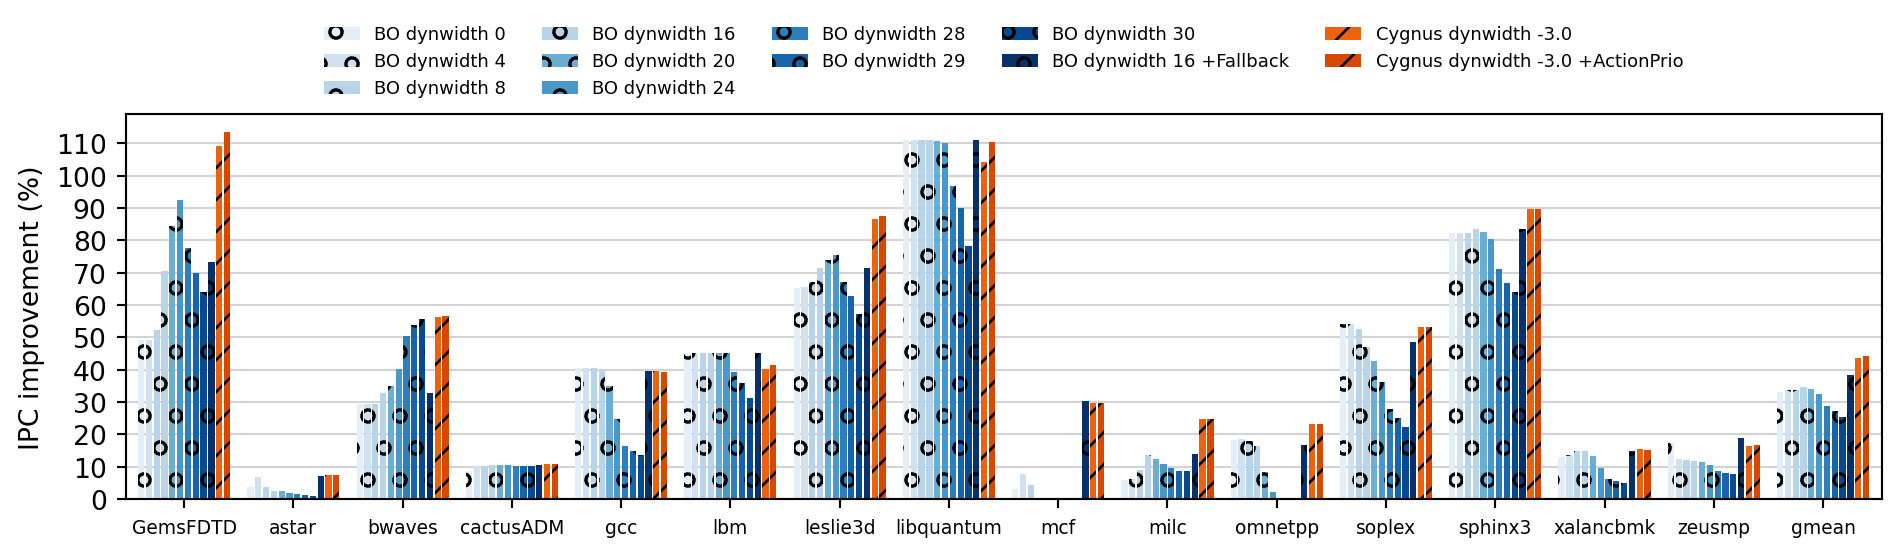

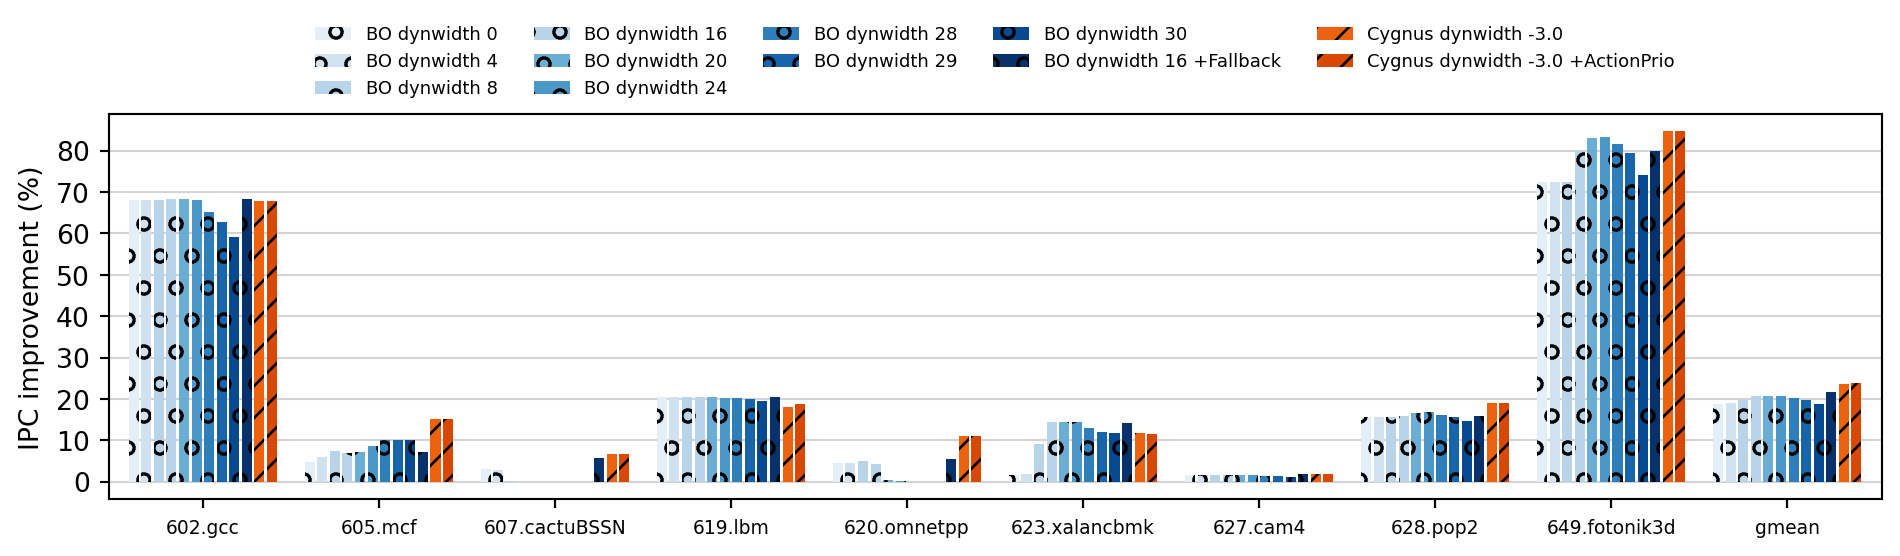

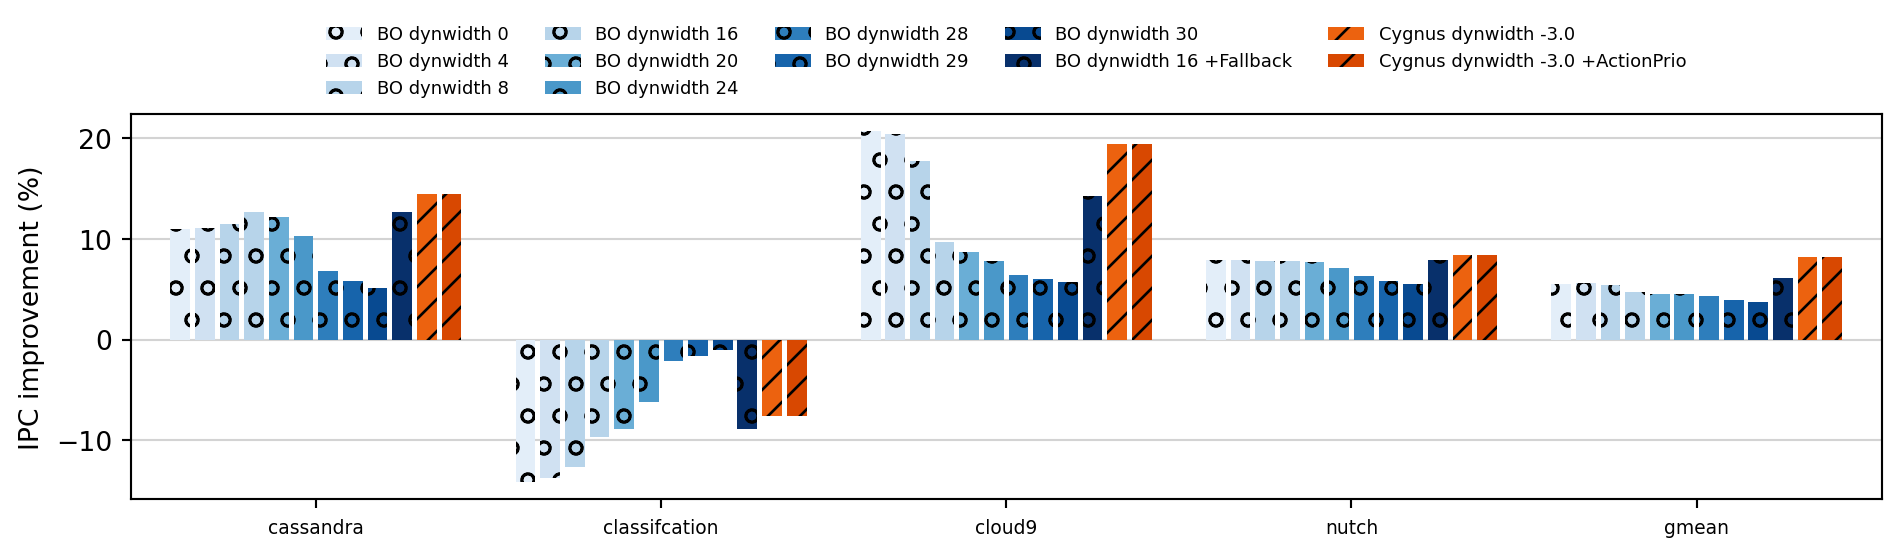

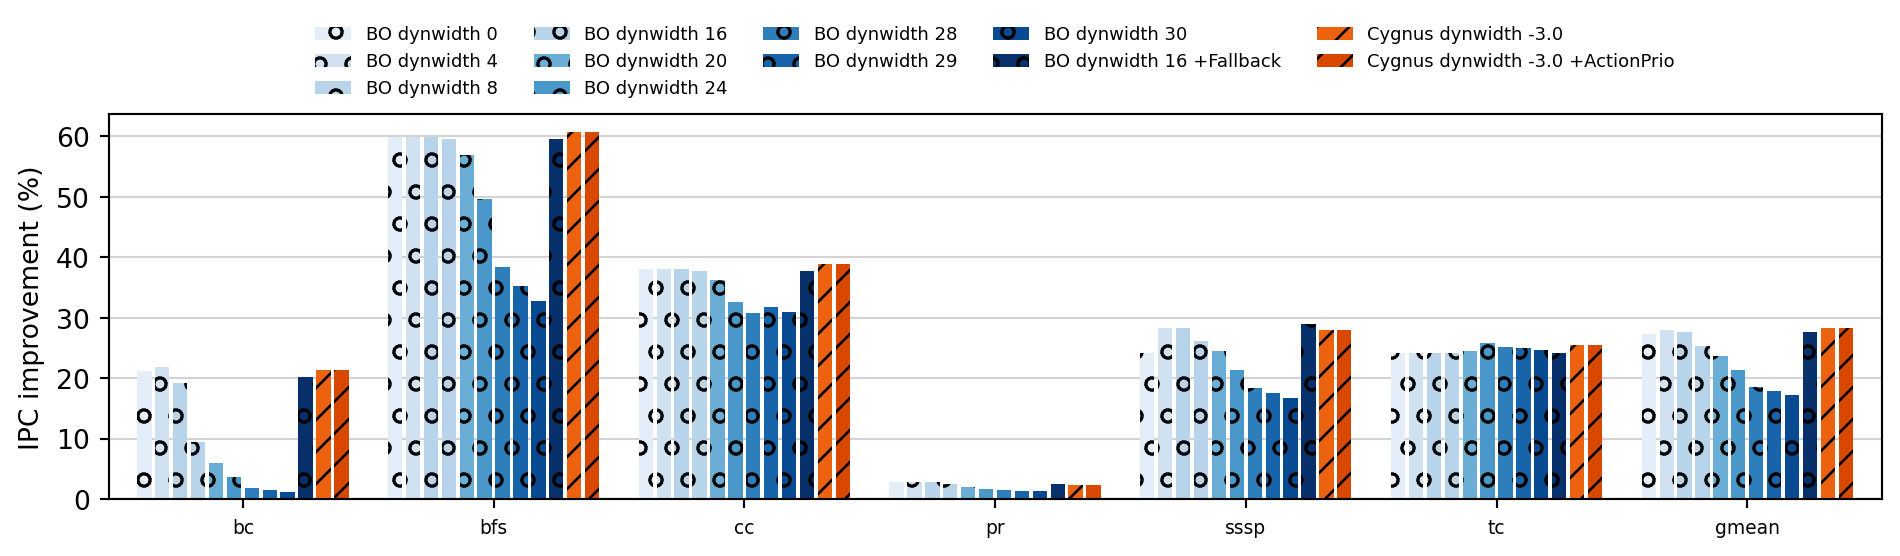

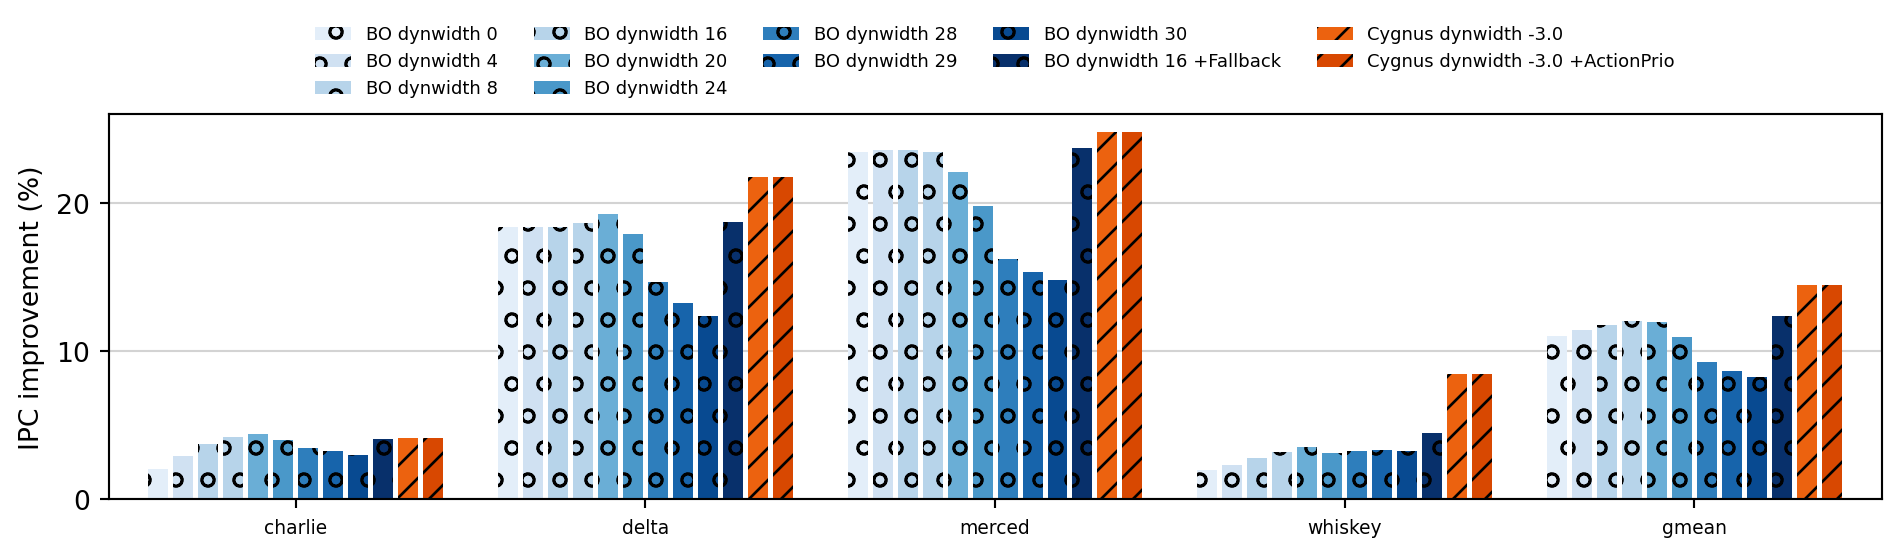

In [17]:
plots.plot_everything(dyndegree_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=dyndegree_colors,
                      hatches=dyndegree_hatches,
                      legend_kwargs=dyndegree_legend_kwargs_wide,
                      label_kwargs=dyndegree_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      dpi=192, figsize=(10, 3))

# Tables

## Fixed degree

In [18]:
tables.table_everything(degree_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,BO depth1,BO depth2,BO depth4,BO depth8,BO width2,BO width4,BO width8,BO widthdyn (16),BO widthdyn (16) +Fallback,Cygnus width2,Cygnus width4,Cygnus width8,Cygnus widthdyn (-3),Cygnus widthdyn (-3) +ActionPrio
run_name,,,,,,,,,,,,,,
GemsFDTD_weighted,63.973450,83.818071,92.587621,71.418982,82.765596,91.612037,65.871649,70.592725,73.245812,99.230568,103.112386,99.232730,109.356284,113.490714
astar_weighted,4.968714,5.340475,4.048227,3.085246,7.499643,8.422921,7.307973,2.581670,7.283523,9.815390,9.362542,6.495748,7.480072,7.405985
bwaves_weighted,55.275177,50.159640,36.066306,29.489575,56.739920,39.484612,32.957200,32.820078,32.820078,62.084416,54.202381,50.476759,56.182785,56.546326
cactusADM_weighted,10.283617,10.328723,8.771130,9.954837,10.379534,10.465013,10.295907,10.425421,10.425421,10.292142,10.605194,10.498619,10.826613,10.832286
gcc_weighted,14.984422,21.690945,26.536538,27.997966,22.767007,29.841647,36.621340,39.504576,39.670022,29.540658,36.260745,39.189803,39.546983,39.446507
lbm_weighted,31.873229,38.658637,39.567773,38.019977,33.744438,38.268118,42.385877,45.174943,45.174943,40.656147,40.177953,39.900073,40.131799,41.389733
leslie3d_weighted,57.125851,70.449405,76.649582,70.858143,67.526034,75.148239,71.298365,71.440804,71.425306,84.238525,87.475234,82.524244,86.672263,87.695292
libquantum_weighted,76.045609,88.478546,86.445121,84.293901,82.885402,91.531912,102.144495,111.005223,111.005223,84.067922,79.453549,83.726262,104.283861,110.305652
mcf_weighted,12.843529,12.379451,9.757008,8.842795,10.879057,10.427363,7.469615,0.405239,30.240022,27.287592,26.511897,20.833338,29.843379,29.861211


=== spec17 weighted ===
ipc_improvement


,BO depth1,BO depth2,BO depth4,BO depth8,BO width2,BO width4,BO width8,BO widthdyn (16),BO widthdyn (16) +Fallback,Cygnus width2,Cygnus width4,Cygnus width8,Cygnus widthdyn (-3),Cygnus widthdyn (-3) +ActionPrio
run_name,,,,,,,,,,,,,,
602.gcc_weighted,55.299616,59.380951,58.933899,56.036574,62.572424,66.056541,67.811728,68.237715,68.251173,66.366546,67.651582,67.851166,67.938462,67.921657
605.mcf_weighted,3.513570,2.110353,-0.379732,-2.568879,11.742784,8.827406,5.601256,6.804194,7.275315,11.069681,8.195337,4.720902,15.142737,15.161217
607.cactuBSSN_weighted,5.544289,2.302734,2.071090,1.963958,4.724022,4.515884,3.444285,0.000138,5.806051,6.238635,5.294295,4.669389,6.714315,6.713862
619.lbm_weighted,17.598438,17.792935,17.089630,16.152836,19.231701,20.055627,20.288732,20.358760,20.358760,18.808035,17.109112,16.899106,18.090748,18.784503
620.omnetpp_weighted,3.238905,4.065627,3.796475,1.763549,4.863871,6.744297,7.525461,4.371546,5.539280,9.349799,9.560934,6.836477,11.010858,11.024476
623.xalancbmk_weighted,11.064230,11.595607,12.014777,11.828555,10.760268,9.392209,7.081458,14.499048,14.251293,6.698902,2.464685,-0.018471,11.631887,11.604586
627.cam4_weighted,1.232197,1.322736,1.399783,1.394970,1.379288,1.530357,1.683772,1.651852,1.735600,1.670133,1.712808,1.715753,1.755351,1.762277
628.pop2_weighted,14.481464,16.067004,16.802424,15.791604,16.144901,17.315194,16.642950,15.773817,15.773817,18.403911,18.835104,18.672563,18.955323,18.988444
649.fotonik3d_weighted,71.193823,75.724398,76.913050,76.159753,79.240088,83.281577,80.053313,79.920785,79.920785,79.511340,83.846051,84.492142,84.660859,84.684989


=== cloudsuite weighted ===
ipc_improvement


,BO depth1,BO depth2,BO depth4,BO depth8,BO width2,BO width4,BO width8,BO widthdyn (16),BO widthdyn (16) +Fallback,Cygnus width2,Cygnus width4,Cygnus width8,Cygnus widthdyn (-3),Cygnus widthdyn (-3) +ActionPrio
run_name,,,,,,,,,,,,,,
cassandra_weighted,8.626130,11.557692,11.250328,9.127010,11.210173,12.689430,12.665262,12.650211,12.699246,15.384491,14.369020,11.641995,14.434079,14.415526
classifcation_weighted,-6.291547,-8.268495,-9.603449,-10.769942,-8.172619,-9.562800,-11.520118,-9.656415,-8.888049,-7.659796,-9.764126,-12.945332,-7.528616,-7.529296
cloud9_weighted,2.514373,3.469348,3.479402,3.683298,13.635133,17.252224,20.138029,9.658447,14.258090,17.212871,20.561544,22.038428,19.380972,19.380071
nutch_weighted,4.913968,5.576560,5.600886,5.466757,6.432580,7.267263,7.718726,7.804584,7.950779,8.429101,8.519809,8.199273,8.383296,8.379357
mean,2.289908,2.825142,2.386726,1.582047,5.420721,6.403189,6.574074,4.731461,6.084583,7.873522,7.795682,6.435168,8.172048,8.166277


=== gap one_phase ===
ipc_improvement


,BO depth1,BO depth2,BO depth4,BO depth8,BO width2,BO width4,BO width8,BO widthdyn (16),BO widthdyn (16) +Fallback,Cygnus width2,Cygnus width4,Cygnus width8,Cygnus widthdyn (-3),Cygnus widthdyn (-3) +ActionPrio
run_name,,,,,,,,,,,,,,
bc,16.652495,17.419811,16.977829,17.939973,18.861625,20.352028,21.367589,9.457755,20.212799,21.982439,23.648981,24.304323,21.339089,21.333950
bfs,31.301667,38.574585,46.073058,53.112538,40.575010,49.482649,56.528918,59.525504,59.593389,47.532371,56.602935,60.318885,60.690502,60.684809
cc,32.121769,31.426493,32.249080,34.943749,35.011995,36.851513,37.747023,37.808687,37.763825,38.217642,38.542589,38.627809,38.815572,38.818863
pr,1.241721,1.342758,1.613796,2.157875,1.363206,1.586932,2.176319,2.515917,2.520729,2.106555,2.574054,3.167450,2.322663,2.316649
sssp,22.706032,23.555812,22.174002,23.195971,25.402370,27.656281,27.892242,26.158882,28.915167,28.481986,29.243122,27.739983,27.979133,28.041631
tc,24.496316,25.399984,16.235038,11.211039,25.765402,25.575286,25.017283,24.232129,24.232129,24.953088,24.048186,23.716100,25.544423,25.539485
mean,20.944678,22.370540,21.774348,22.689332,23.835426,26.041337,27.396454,25.280281,27.714950,26.395563,28.066297,28.509778,28.249671,28.256853


=== google one_phase ===
ipc_improvement


,BO depth1,BO depth2,BO depth4,BO depth8,BO width2,BO width4,BO width8,BO widthdyn (16),BO widthdyn (16) +Fallback,Cygnus width2,Cygnus width4,Cygnus width8,Cygnus widthdyn (-3),Cygnus widthdyn (-3) +ActionPrio
run_name,,,,,,,,,,,,,,
charlie,3.056042,3.318345,2.386632,1.011483,3.176460,3.124254,2.601682,4.176384,4.050504,5.309174,4.255265,2.980591,4.128750,4.121764
delta,14.692580,17.626357,14.756415,10.126263,16.950929,17.974106,18.224012,18.670720,18.702359,23.679424,22.396167,18.899579,21.772727,21.774678
merced,15.934177,19.263810,20.513524,19.311138,19.037531,22.092576,23.602315,23.452769,23.674007,24.426076,24.889416,23.327728,24.769555,24.767735
whiskey,5.207964,5.573573,3.894731,1.389849,5.694913,5.459320,4.280013,3.173779,4.455852,8.307204,5.648845,2.043961,8.412170,8.454938
mean,9.576449,11.220923,10.131711,7.704607,11.001941,11.874327,11.820637,12.020049,12.390263,15.102062,13.910577,11.415582,14.439733,14.449140


In [19]:
tables.table_metric_all(degree_df, suites, 'ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
BO depth1,18.919259,27.336990,18.303050,2.289908,20.944678,9.576449
BO depth2,21.018730,31.567563,18.780758,2.825142,22.370540,11.220923
BO depth4,20.750481,31.780577,18.506881,2.386726,21.774348,10.131711
BO depth8,19.553154,29.854837,17.403991,1.582047,22.689332,7.704607
BO width2,22.547661,32.755249,21.000944,5.420721,23.835426,11.001941
BO width4,24.291940,35.696789,21.524020,6.403189,26.041337,11.874327
BO width8,24.226795,35.455435,20.662772,6.574074,27.396454,11.820637
BO widthdyn (16),23.402327,34.659699,20.786975,4.731461,25.280281,12.020049
BO widthdyn (16) +Fallback,25.518713,38.295443,21.739574,6.084583,27.714950,12.390263
Cygnus width2,26.285166,39.401775,21.756179,7.873522,26.395563,15.102062


## Dynamic degree